In [93]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os
os.nice(20)

# Add local paths
import sys
hnlDIR = os.environ['_']
sys.path.append('../pyscript')

# From pyscript Library
from Plotting import *
from Dictionary import *
from HelperFunctions import *
from CutFunctions import *

import ROOT
import array
import pickle
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

import warnings
warnings.filterwarnings("ignore")

<h1>Configuration Stuff Here</h1>

In [4]:
m = 200

ifSave = True
savePath = "../plot_files/06April2024_m"+str(m)+"_v3_systematics/"

In [5]:
unisim_list = [ 'slc_xsec_unisim_DecayAngMEC', 
               'slc_xsec_unisim_ThetaDelta2NRad',
               'slc_xsec_unisim_Theta_Delta2Npi', 
               'slc_xsec_unisim_VecFFCCQEshape',]

multisigma_list = [
        'slc_xsec_multisigma_CoulombCCQE',
       'slc_xsec_multisigma_NonRESBGvbarnCC1pi',
       'slc_xsec_multisigma_NonRESBGvbarnCC2pi',
       'slc_xsec_multisigma_NonRESBGvbarnNC1pi',
       'slc_xsec_multisigma_NonRESBGvbarnNC2pi',
       'slc_xsec_multisigma_NonRESBGvbarpCC1pi',
       'slc_xsec_multisigma_NonRESBGvbarpCC2pi',
       'slc_xsec_multisigma_NonRESBGvbarpNC1pi',
       'slc_xsec_multisigma_NonRESBGvbarpNC2pi',
       'slc_xsec_multisigma_NonRESBGvnCC1pi',
       'slc_xsec_multisigma_NonRESBGvnCC2pi',
       'slc_xsec_multisigma_NonRESBGvnNC1pi',
       'slc_xsec_multisigma_NonRESBGvnNC2pi',
       'slc_xsec_multisigma_NonRESBGvpCC1pi',
       'slc_xsec_multisigma_NonRESBGvpCC2pi',
       'slc_xsec_multisigma_NonRESBGvpNC1pi',
       'slc_xsec_multisigma_NonRESBGvpNC2pi', 
       'slc_xsec_multisigma_NormCCMEC',
       'slc_xsec_multisigma_NormNCMEC', 
       'slc_xsec_multisigma_RDecBR1eta',
       'slc_xsec_multisigma_RDecBR1gamma', 
       'slc_xsec_multisigma_RPA_CCQE',
       'slc_xsec_multisigma_NormNCCOH', 
       'slc_xsec_multisigma_NormCCCOH'
]

multisim_list = [
        "slc_xsec_multisim_ZExpA",
        "slc_xsec_multisim_NCEL",
        "slc_xsec_multisim_CCRES",
        "slc_xsec_multisim_NCRES",
        "slc_xsec_multisim_DISBY",
        "slc_xsec_multisim_FSI_pi",
        "slc_xsec_multisim_FSI_N"
]

flux_list = [
        "slc_flux_weight_expskin",
        "slc_flux_weight_horncurrent",
        "slc_flux_weight_kminus",
        "slc_flux_weight_kplus",
        "slc_flux_weight_kzero",
        "slc_flux_weight_nucleoninexsec",
        "slc_flux_weight_nucleonqexsec",
        "slc_flux_weight_nucleontotxsec",
        "slc_flux_weight_piminus",
        "slc_flux_weight_pioninexsex",
        "slc_flux_weight_pionqexsec",
        "slc_flux_weight_piontotxsec",
        "slc_flux_weight_piplus"    
]

<h1> Read in PKL Dataframe </h1>

<h3>HNL</h3>

In [6]:
hnl_path = "../pkl_files/v3_April2024/df_m"+str(m)+"_v3_hnl.pkl"

file = open(hnl_path, 'rb')
df_hnl = pickle.load(file)
file.close
del hnl_path

In [7]:
df_hnl = df_hnl[["run", "subrun", "event", "slc_id", "scale_pot", "simU", "scaledU", "mod_t", 'slc_comp', 'slc_true_event_type']]

<h3>TPC Neutrino</h3>

In [8]:
nu_path = "../pkl_files/v3_April2024/df_m"+str(m)+"_v3_nu.pkl"

file = open(nu_path, 'rb')
df_nu = pickle.load(file)
file.close
del nu_path

In [9]:
df_nu = df_nu[["run", "subrun", "event", "slc_id", "scale_pot", "mod_t", 'slc_comp', 'slc_true_event_type']]

<h3>Intime Cosmics</h3>

In [10]:
cos_path = "../pkl_files/v3_April2024/df_m"+str(m)+"_v3_cos.pkl"

file = open(cos_path, 'rb')
df_cos = pickle.load(file)
file.close
del cos_path

In [11]:
df_cos = df_cos[["run", "subrun", "event", "slc_id", "scale_pot", "mod_t", 'slc_comp', 'slc_true_event_type']]

<h1> Load Systematics Dataframe</h1>

<h3> HNL </h3>

In [ ]:
dfw_hnl = pd.DataFrame()

print(len(df_hnl))

for i in range(0, 4):
#for i in range(0, 1):
    hnl_path = "../pkl_files/v3_April2024/hnl_m"+str(m)+"_flxw_{}.pkl".format(i)
    print(hnl_path)
    
    file = open(hnl_path, 'rb')   
    df = pickle.load(file)
    
    #keep certain branches only
    branches = ['run','subrun','event','slc_id', 'slc_comp', 'slc_flux_weight_total'] + flux_list
    df = df[branches]
    
 
    df = df.merge(df_hnl, how='inner', on=['run','subrun','event','slc_id','slc_comp'])
    print(len(df))
    
    dfw_hnl = pd.concat((dfw_hnl, df), ignore_index=True)
    file.close()
    
del df_hnl

print(len(dfw_hnl))

<h3> TPC Neutrino </h3>

In [ ]:
dfw_nu = pd.DataFrame()

print(len(df_nu))

for i in range(0, 51):
#for i in range(0, 2):
    nu_path = "../pkl_files/v3_April2024/rockbox_flxw_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    #print(df.columns)
    
    df = df.merge(df_nu, how='inner', on=['run','subrun','event','slc_id', 'slc_comp'])
    print(len(df))
    
    dfw_nu = pd.concat((dfw_nu, df), ignore_index=True)
    file.close()
    
#del df_nu

print(len(dfw_nu))

<h3> NCPi0 </h3>

In [ ]:
dfw_ncpi0 = pd.DataFrame()

print(len(df_nu))

for i in range(0, 8):
    nu_path = "../pkl_files/v3_April2024/ncpi0_flxw_{}.pkl".format(i)
    print(nu_path)
    
    file = open(nu_path, 'rb')
    df = pickle.load(file)
    
    #print(df.columns)
    
    df = df.merge(df_nu, how='inner', on=['run','subrun','event','slc_id', 'slc_comp'])
    print(len(df))
    
    dfw_ncpi0 = pd.concat((dfw_ncpi0, df), ignore_index=True)
    file.close()
    
del df_nu

print(len(dfw_nu))

In [ ]:
dfw_nu_combined = pd.concat([dfw_ncpi0, dfw_nu])
print(len(dfw_nu_combined))

del dfw_nu
del dfw_ncpi0

In [ ]:
dfw_nu = dfw_nu_combined

del dfw_nu_combined

<h1>SAVE THIS DATAFRAME</h1>

In [ ]:
dfw_hnl.to_pickle("../pkl_files/v3_April2024/df_hnl_m"+str(m)+"_v3_weight.pkl", protocol = 5)
dfw_nu.to_pickle("../pkl_files/v3_April2024/df_nu_m"+str(m)+"_v3_weight.pkl", protocol = 5)
df_cos.to_pickle("../pkl_files/v3_April2024/df_cos_m"+str(m)+"_v3_weight.pkl", protocol = 5)

<h1> START FROM HERE!!! LOAD PKL FILE WITH FLX WEIGHT ADDED </h1>

<h3>HNL</h3>

In [12]:
file = open("../pkl_files/v3_April2024/df_hnl_m"+str(m)+"_v3_weight.pkl", 'rb')
df_hnl = pickle.load(file)
file.close()

<h3>TPC Neutrino</h3>

In [13]:
file = open("../pkl_files/v3_April2024/df_nu_m"+str(m)+"_v3_weight.pkl", 'rb')
df_nu = pickle.load(file)
file.close()

<h3>Intime Cosmics</h3>

In [14]:
file = open("../pkl_files/v3_April2024/df_cos_m"+str(m)+"_v3_weight.pkl", 'rb')
df_cos = pickle.load(file)
file.close()

In [15]:
df_hnl = df_hnl.reset_index()
df_nu = df_nu.reset_index()
df_cos = df_cos.reset_index()

<h3> Configure some plots stuff </h3> 

In [16]:
xmin = 0
xmax = 19
xnbin = 19

hnl_ymin = 0
hnl_ymax = 5000

nu_ymin = 0
nu_ymax = 600

<h3> Organise Some Stuff</h3>

In [17]:
hnl_dict = {}
nu_dict = {}

<h1> Make Beam Bucket - Post PID</h1>

In [18]:
true_counts = 1
start_counts = 1
    
if m == 200:
    true_counts = 1481.1881420359975
    start_counts = 1356.6892755185766

In [19]:
simU = df_hnl['simU'].unique()[0]
plotU = df_hnl['scaledU'].unique()[0]
scaleHNLPlot = (plotU/simU)**2

true_counts = true_counts * scaleHNLPlot
start_counts =  start_counts * scaleHNLPlot

print("Scale Umu by " + str(scaleHNLPlot))
print("Scaled Umu = " + str(plotU))
print("Scaled true counts = " + str(true_counts))
print("Scaled start counts = " + str(start_counts))

Scale Umu by 100.0
Scaled Umu = 1e-06
Scaled true counts = 148118.81420359976
Scaled start counts = 135668.92755185766


200 MeV HNL ${\pi}^{0}$
|U$_{{\mu 4}}$|$^{{2}}$ = $1\times10^{-6}$


<Figure size 432x288 with 0 Axes>

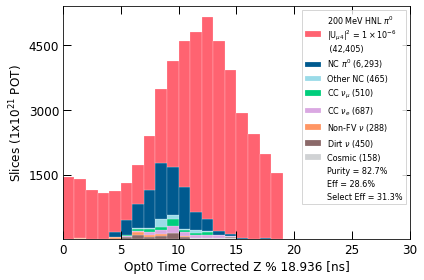

In [20]:
width = 18.936
label = str(m) + ' MeV HNL ${\pi}^{0}$' + '\n' + '|U$_{{\mu 4}}$|$^{{2}}$ = ' +str(sci_notation(plotU,0,0))
print(label)

hist, bins = plot_slc_var(df_hnl, df_nu, df_cos,
                    true_counts, start_counts, 
                    'mod_t', 
                    xmin = 0, xmax = 30, xnbin = 30,
                    xtitle = 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',
                    ifAddLegend = True, addLegend = label
                    )
plt.show()

<h1>Plot Overlay Instead of Stacked</h1>

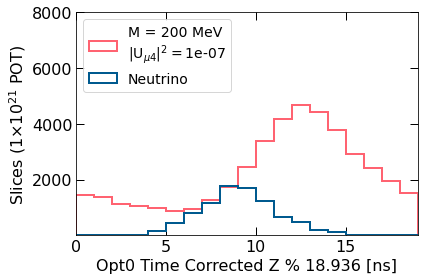

In [21]:
fig, ax1 = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax

#-----------------------------------------------------------------#
pltdf = df_hnl['mod_t']
weights = df_hnl['scale_pot']

_, _, _ = ax1.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["Flamingo"],
                            linestyle = "-",
                            linewidth = 2,
                            label = "M = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(simU))
                        )
#-----------------------------------------------------------------#
pltdf = df_nu['mod_t']
weights = df_nu['scale_pot']

_, _, _ = ax1.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["Teal"],
                            linestyle = "-",
                            linewidth = 2,
                            label = "Neutrino"
                        )
#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  r"Slices (1$\times10^{21}$ POT)", 16)

ax1.set_xlim(xmin, xmax)
#ax1.set_yscale('log')
ax1.set_ylim(1, 8000)

#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("hnl_neutrino_overlay.png"), dpi=200)
    
plt.show()

<h1>Statistics Uncertainty</h1>

<h3>HNL</h3>

In [22]:
#bin it
array = np.array(df_hnl['mod_t'])

hnl_stat_noScale, bins = np.histogram(array, bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin))

#No Scale
print("\nprescale: entries per bin")
print(hnl_stat_noScale)

print("\nprescale: sqrt(entries) per bin")
hnl_stat_noScale_err = np.sqrt(hnl_stat_noScale)
print(hnl_stat_noScale_err)

print("\nprescale: fractional error = sqrt(entries) per bin/ entries per bin")
hnl_stat_rel_err = hnl_stat_noScale_err / hnl_stat_noScale
print(hnl_stat_rel_err)


prescale: entries per bin
[ 588  559  457  428  394  349  376  508  700  990 1367 1692 1892 1787
 1536 1178  985  794  617]

prescale: sqrt(entries) per bin
[24.24871131 23.64318084 21.37755833 20.68816087 19.84943324 18.68154169
 19.39071943 22.53885534 26.45751311 31.46426545 36.97296309 41.1339276
 43.49712634 42.27292278 39.19183588 34.3220046  31.38470965 28.17800561
 24.8394847 ]

prescale: fractional error = sqrt(entries) per bin/ entries per bin
[0.0412393  0.04229549 0.04677803 0.04833682 0.05037927 0.05352877
 0.05157106 0.04436783 0.03779645 0.03178209 0.02704679 0.02431083
 0.02299002 0.0236558  0.02551552 0.02913583 0.03186265 0.03548867
 0.04025848]


In [23]:
#This is the smart way
cov = np.diag(hnl_stat_noScale) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
fractional = cov / np.outer(hnl_stat_noScale, hnl_stat_noScale) # N / (N * N)
fractional_err = np.sqrt(np.diag(fractional)) # sqrt(N)
fractional_err

array([0.0412393 , 0.04229549, 0.04677803, 0.04833682, 0.05037927,
       0.05352877, 0.05157106, 0.04436783, 0.03779645, 0.03178209,
       0.02704679, 0.02431083, 0.02299002, 0.0236558 , 0.02551552,
       0.02913583, 0.03186265, 0.03548867, 0.04025848])

In [24]:
hnl_stat_noScale_plot = np.insert(hnl_stat_noScale, 0, 0)

bins_mid = np.convolve(bins, [0.5, 0.5], "valid")

In [25]:
#save in dictionary
hnl_dict['hnl_cv'] = hnl_stat_noScale
hnl_dict['hnl_cv_plot'] = hnl_stat_noScale_plot

hnl_dict['bins'] = bins
hnl_dict['bins_mid'] = bins_mid

hnl_dict['neg_stat_err']= hnl_stat_noScale_err
hnl_dict['pos_stat_err']= hnl_stat_noScale_err

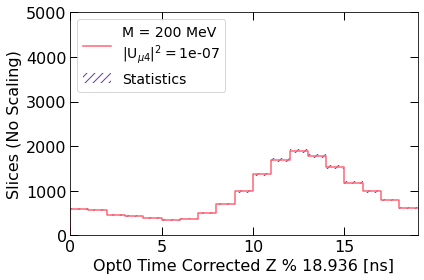

In [26]:
fig, (ax1) = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax

#-----------------------------------------------------------------#
#nStat NoScale
ax1.step(bins, hnl_stat_noScale_plot
         , color = col_dict['Flamingo']
         , label =  "M = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(simU))
        )

#-----------------------------------------------------------------#
#poisson stats

bottom = hnl_dict['hnl_cv'] - hnl_dict['neg_stat_err']
peak = hnl_dict['hnl_cv'] + hnl_dict['pos_stat_err']
height = peak - bottom

plt. rcParams["hatch.color"] = col_dict['Mauve']
ax1.bar(
        x = bins[:-1]
        , height= height
        , width = np.diff(bins)
        , bottom = bottom
        , align = 'edge'
        , hatch='///'
        , fc='w'
        , label = "Statistics"
                        )
#-----------------------------------------------------------------#

ax1.legend(loc = 'upper left',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(hnl_ymin, hnl_ymax)

#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("hnl_beam_bucket_statistics_error.png"), dpi=200)
    
plt.show()

<h3>Neutrino</h3>

In [27]:
#bin it
array = np.array(df_nu['mod_t'])
nu_stat_noScale, _ = np.histogram(array, bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin))

#No Scale
print("\nprescale: entries per bin")
print(nu_stat_noScale)

print("\nprescale: sqrt(entries) per bin")
nu_stat_noScale_err = np.sqrt(nu_stat_noScale)
print(nu_stat_noScale_err)

print("\nprescale: fractional error = sqrt(entries) per bin/ entries per bin")
nu_stat_rel_err = nu_stat_noScale_err / nu_stat_noScale
#fill nan with 0
nu_stat_rel_err = np.nan_to_num(nu_stat_rel_err, nan=0)
print(nu_stat_rel_err)


prescale: entries per bin
[  0   1   2   2  19  58  94 143 214 192 155  72  52  18  12   4   2   3
   1]

prescale: sqrt(entries) per bin
[ 0.          1.          1.41421356  1.41421356  4.35889894  7.61577311
  9.69535971 11.95826074 14.62873884 13.85640646 12.4498996   8.48528137
  7.21110255  4.24264069  3.46410162  2.          1.41421356  1.73205081
  1.        ]

prescale: fractional error = sqrt(entries) per bin/ entries per bin
[0.         1.         0.70710678 0.70710678 0.22941573 0.13130643
 0.10314212 0.0836242  0.06835859 0.07216878 0.08032193 0.11785113
 0.13867505 0.23570226 0.28867513 0.5        0.70710678 0.57735027
 1.        ]


In [28]:
nu_stat_noScale_plot = np.insert(nu_stat_noScale, 0, 0)


In [29]:
nu_dict['nu_cv'] = nu_stat_noScale
nu_dict['nu_cv_plot'] = nu_stat_noScale_plot

nu_dict['bins'] = bins
nu_dict['bins_mid'] = bins_mid

nu_dict['neg_stat_err']= nu_stat_noScale_err
nu_dict['pos_stat_err']= nu_stat_noScale_err

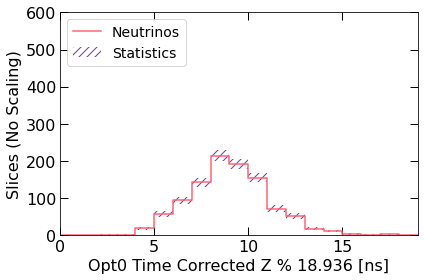

In [30]:
fig, (ax1) = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax

#-----------------------------------------------------------------#
#nStat NoScale
ax1.step(bins, nu_stat_noScale_plot
         , color = col_dict['Flamingo']
         , label =  "Neutrinos"
        )

bottom = nu_dict['nu_cv'] - nu_dict['neg_stat_err']
peak = nu_dict['nu_cv'] + nu_dict['pos_stat_err']
height = peak - bottom

plt. rcParams["hatch.color"] = col_dict['Mauve']
ax1.bar(
        x = bins[:-1]
        , height= height
        , width = np.diff(bins)
        , bottom = bottom
        , align = 'edge'
        , hatch='///'
        , fc='w'
        , label = "Statistics"
                        )
#-----------------------------------------------------------------#

ax1.legend(loc = 'upper left',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(nu_ymin, nu_ymax)

#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_statistics_error.png"), dpi=200)
    
plt.show()

<h1>Flux Weights</h1>

In [31]:
def get_median_68_quantile(n_cv, n_arr):
    print("CV array")
    n_cv = np.array(n_cv)
    print(n_cv)

    #check shape
    print("Weight array shape")
    n_arr = np.array(n_arr)
    print(n_arr.shape)

    print('\n Median')
    print(np.median(n_arr, axis=0))
    median = np.median(n_arr, axis=0)
    
    print('\n Low 34.1 quantile')
    print(np.percentile(n_arr, 15.87, axis=0))
    low_flux = np.percentile(n_arr, 15.87, axis=0)

    print('\n High 34.1 quantile')
    print(np.percentile(n_arr, 84.13, axis=0))
    high_flux = np.percentile(n_arr, 84.13, axis=0)

    print('\n Standard Error')
    flx_err = [abs(n_cv - low_flux), abs(high_flux - n_cv)]
    flx_err = np.array(flx_err)
    print(flx_err)
    
    median = np.array(median)
    flx_err = np.array(flx_err)
    return median, flx_err

In [32]:
def get_cov_corr_matrix(cv, universe):

    print(cv.shape)
    print(universe.shape)
    
    #construct covariance matrix
    cov = np.cov(np.subtract(cv[np.newaxis,:], universe).transpose())

    #error = sqrt(diag)
    err = np.sqrt(np.diagonal(cov))

    #construct correlation matrix
    corr = cov/np.outer(err, err)  
    
    return cov, corr

In [33]:
def make_df_flxw(df):
    
    #explode array into columns
    df_flxw = pd.DataFrame(df['slc_flux_weight_total'].tolist(),index=df.index).add_prefix('flxw_')
    
    #drop column
    #df = df.drop(columns='slc_flux_weight_total')

    #merge 2 arrays together
    df = pd.concat([df, df_flxw], axis = 1)
    
    #add nominal flux weight = 1
    df['flxw_nom'] = 1
    
    del df_flxw
    return df

<h3>Prep Work</h3>

In [34]:
df_hnl = make_df_flxw(df_hnl)

#Check for NAN for cosmic slice
print(df_hnl[df_hnl.flxw_0 != df_hnl.flxw_0])

#fill NAN with 1
df_hnl = df_hnl.fillna(1)
df_hnl

       index  run  subrun  event  slc_id  slc_comp slc_flux_weight_total  \
1187    1187    1     348     40       0  0.017492                    []   
1455    1455    1     365     40       1  0.118442                    []   
1504    1504    1     372     34       0  0.026644                    []   
4066    4066    1      52     35       0  0.093946                    []   
4490    4490    1     523     26       0  0.057239                    []   
4815    4815    1      56     33       0  0.069245                    []   
5008    5008    1     564     17       0  0.017078                    []   
5297    5297    1     581     15       0  0.027433                    []   
5439    5439    1     605     14       0  0.072555                    []   
6076    6076    1     635     15       1  0.062404                    []   
6819    6819    1     660      3       0  0.271184                    []   
7681    7681    1     710     29       0  0.089286                    []   
8541    8541

,index,run,subrun,event,slc_id,slc_comp,slc_flux_weight_total,slc_flux_weight_expskin,slc_flux_weight_horncurrent,slc_flux_weight_kminus,...,flxw_991,flxw_992,flxw_993,flxw_994,flxw_995,flxw_996,flxw_997,flxw_998,flxw_999,flxw_nom
0,0,1,112,8,0,1.000000,"[0.9667072, 1.0253192, 0.93415844, 1.1263641, ...","[1.0032504, 0.9947592, 1.0031562, 0.9949983, 1...","[0.9966951, 0.99555457, 0.99693567, 0.9957935,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.873999,0.823488,1.105268,1.031984,0.945373,1.015761,1.021503,1.008230,0.958535,1
1,1,1,112,11,2,0.986141,"[0.97673684, 1.0325998, 0.9500021, 1.2077136, ...","[1.004804, 0.99225426, 1.0046648, 0.9926076, 1...","[0.9996765, 0.9976584, 0.99970007, 0.99958825,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.929792,0.979218,1.128390,1.023552,0.941491,1.040748,1.053471,1.027076,0.992161,1
2,2,1,112,12,0,1.000000,"[0.88563824, 0.9916334, 0.8147252, 0.96756244,...","[0.99627507, 1.006006, 0.99638295, 1.0057319, ...","[0.97499967, 0.9818406, 0.9768196, 0.9681796, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.831444,0.803932,1.011527,0.893546,0.884719,0.900764,0.972478,0.985731,0.885131,1
3,3,1,112,16,2,0.890524,"[1.0379539, 1.0361108, 1.1188725, 1.1394842, 1...","[1.0031785, 0.99487513, 1.0030864, 0.9951089, ...","[1.0058379, 1.0042259, 1.0054129, 1.0074306, 1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.974822,0.993251,1.034027,1.098493,1.030958,1.090851,1.088515,1.034132,1.002571,1
4,4,1,112,19,1,1.000000,"[1.0012332, 1.0184393, 0.88565904, 0.94395673,...","[1.0132631, 0.97861505, 1.0128789, 0.9795906, ...","[0.9950586, 1.0069573, 0.9954183, 0.9937106, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.880064,0.851225,1.065553,1.051132,0.858153,1.003369,1.017163,1.061087,1.027446,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17192,17192,1,31,23,1,0.853477,"[0.9461292, 1.1032542, 0.8785496, 1.1187052, 1...","[0.98650414, 1.0217602, 0.9868951, 1.0207676, ...","[0.99164206, 1.0148185, 0.9922505, 0.98936206,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.896439,0.868207,1.091204,0.946711,0.970242,0.953765,0.987549,1.026774,1.004563,1
17193,17193,1,31,29,0,0.991186,"[0.98960465, 1.0904421, 0.8632214, 1.0619339, ...","[0.9818766, 1.0292214, 0.98240167, 1.0278884, ...","[0.9992197, 1.0113112, 0.9992765, 0.99900687, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.877391,0.892689,1.091981,1.045120,0.935489,1.083205,1.044912,1.103757,1.011247,1
17194,17194,1,31,33,0,0.958880,"[1.0943979, 1.2439487, 1.0407724, 1.3849674, 1...","[1.001027, 0.9983441, 1.0009973, 0.99841964, 1...","[1.0433365, 1.0456685, 1.0401819, 1.0551587, 1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.063326,1.077740,1.291237,1.311120,1.107502,1.296123,1.289034,1.194800,1.230779,1
17195,17195,1,31,34,0,0.958730,"[1.049624, 1.1164593, 0.97009933, 1.1982185, 1...","[0.99788994, 1.0034021, 0.9979511, 1.0032469, ...","[1.0156734, 1.0020928, 1.0145324, 1.0199491, 1...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.963517,0.990317,1.160576,1.101491,0.986490,1.110129,1.149457,1.100395,1.053937,1


In [35]:
df_nu = make_df_flxw(df_nu)

#Check for NAN for cosmic slice
print(df_nu[df_nu.flxw_0 != df_nu.flxw_0])

#fill NAN with 1
df_nu = df_nu.fillna(1)
df_nu

     index  run  subrun  event  slc_id  slc_comp slc_flux_weight_expskin  \
700     54    1    6915     48       1  0.027888                      []   
771    125    1    8816     66       0  0.059904                      []   
826    180    1    9968     49       3  0.054783                      []   
888    242    1     219     98       3  0.042827                      []   

    slc_flux_weight_horncurrent slc_flux_weight_kminus slc_flux_weight_kplus  \
700                          []                     []                    []   
771                          []                     []                    []   
826                          []                     []                    []   
888                          []                     []                    []   

     ... flxw_991 flxw_992 flxw_993 flxw_994 flxw_995 flxw_996 flxw_997  \
700  ...      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
771  ...      NaN      NaN      NaN      NaN      NaN      NaN      

,index,run,subrun,event,slc_id,slc_comp,slc_flux_weight_expskin,slc_flux_weight_horncurrent,slc_flux_weight_kminus,slc_flux_weight_kplus,...,flxw_991,flxw_992,flxw_993,flxw_994,flxw_995,flxw_996,flxw_997,flxw_998,flxw_999,flxw_nom
0,0,1,1398,2726,1,0.957983,"[0.9896853, 1.016631, 0.9899841, 1.0158724, 0....","[0.9992621, 1.003277, 0.9993158, 0.99906075, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.213647,1.380173,1.400525,1.114223,1.288904,1.208104,1.194214,1.241580,1.242335,1
1,1,1,1335,2774,1,0.988210,"[0.9918531, 1.0131357, 0.99208915, 1.0125365, ...","[0.9957701, 1.0028076, 0.996078, 0.9946162, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.037190,0.946058,1.017179,1.067278,1.055050,1.053346,1.060429,0.996293,0.965174,1
2,2,1,166,2751,0,1.000000,"[0.98360384, 1.0264366, 0.9840788, 1.0252305, ...","[0.99531144, 1.0042114, 0.99565274, 0.9940324,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.172324,1.177505,1.161940,1.131562,1.223324,1.143894,1.249331,1.149929,1.181181,1
3,3,1,20,4577,2,0.932299,"[0.8584293, 1.228263, 0.8625306, 1.2178499, 0....","[0.98392385, 1.0122006, 0.98509413, 0.9795383,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.124340,1.275864,1.373219,0.608947,1.361416,0.991544,1.286962,1.144688,1.063563,1
4,4,1,19,2264,1,0.984322,"[0.9650692, 1.056321, 0.96608114, 1.0537517, 0...","[0.9956735, 1.007387, 0.9959884, 0.9944932, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.886462,0.985878,1.081029,0.826889,1.059182,0.943953,1.040076,1.035295,1.033997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,393,1,4883,206,1,0.950540,"[0.9706941, 1.0472516, 0.97154313, 1.045096, 0...","[0.9951253, 1.0057919, 0.9954802, 0.9937955, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.915531,0.974600,1.127512,0.863264,1.373918,0.996740,1.065464,0.937610,1.090481,1
1040,394,1,4884,212,0,0.998112,"[0.967574, 1.0522825, 0.96851337, 1.0498973, 0...","[0.998075, 1.0083754, 0.99821514, 0.9975499, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9371223, 1.0646625, 0.8240639, 1.0550023, 1...",...,0.931687,0.946556,1.080704,0.932169,1.040850,1.007601,1.103543,1.047019,0.985627,1
1041,395,1,5887,74,2,1.000000,"[0.98179364, 1.0293553, 0.9823211, 1.0280161, ...","[0.9919417, 1.00147, 0.9925283, 0.9897434, 0.9...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.786250,0.766712,0.958946,0.716331,1.069476,0.851584,0.899814,0.785476,0.815271,1
1042,396,1,5890,71,2,0.996000,"[0.83571, 1.2648947, 0.8404695, 1.2528105, 0.9...","[0.9873008, 1.0219469, 0.9882252, 0.9838365, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.624208,2.319005,1.135464,0.895271,0.496553,1.489421,1.429646,1.414054,3.173893,1


<h3>Calculate Median and Value at 68 percentile</h3>

<h3>HNL</h3>

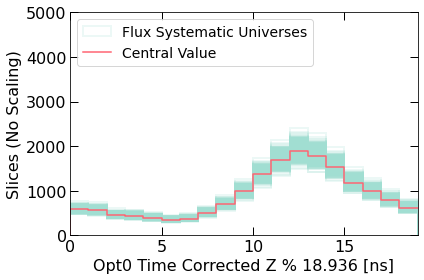

In [36]:
hnl_flx_universe = []

fig, ax = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#-----------------------------------------------------------------#
#Universe
pltdf = df_hnl['mod_t']

for i in range(0, 1000):
    weights = df_hnl['flxw_{}'.format(i)]
    label = ''
    if i == 0:
        label = "Flux Systematic Universes"
        
    hnl_n, _, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["PastelGreen"],
                            alpha = 0.2,
                            linestyle = "-",
                            linewidth = 2,
                            label = label
                        )
    hnl_flx_universe.append(hnl_n)
#-----------------------------------------------------------------#
#Central Value
ax.step(bins, hnl_dict['hnl_cv_plot']
         , color = col_dict['Flamingo']
         , label =  "Central Value"
        )
#-----------------------------------------------------------------#
ax.legend(loc = 'upper left',fontsize = 14)

plot_tick(ax, 16)
plot_title(ax, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax.set_xlim(xmin, xmax)
ax.set_ylim(hnl_ymin, hnl_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("hnl_beam_bucket_flux_weight_universe.png"), dpi=200)
plt.show()

<h3>Median and 68% Quantile</h3>

In [37]:
hnl_flx_universe = np.array(hnl_flx_universe)
hnl_flx_universe = np.sort(hnl_flx_universe, axis = 0)

hnl_flx_median, hnl_flx_err = get_median_68_quantile(hnl_dict['hnl_cv'], hnl_flx_universe)

#make array for plotting
hnl_flx_median_plot = np.insert(hnl_flx_median, 0, 0)

CV array
[ 588  559  457  428  394  349  376  508  700  990 1367 1692 1892 1787
 1536 1178  985  794  617]
Weight array shape
(1000, 19)

 Median
[ 591.08080432  566.53596524  462.59715801  438.78164406  401.02262479
  356.67761433  381.12447092  511.81619645  700.92995146  991.39059123
 1369.4478163  1693.05854201 1892.53811176 1793.97115898 1549.36965966
 1190.12140483  996.92350978  802.28294899  629.76145235]

 Low 34.1 quantile
[ 550.56391522  525.91814213  431.44001473  407.80401895  372.94382971
  332.77659431  355.45761758  477.34433045  656.39778563  926.10789796
 1281.93392868 1584.96132352 1771.70746185 1678.32812817 1448.39940522
 1111.28823756  932.84962997  750.57464146  584.74367596]

 High 34.1 quantile
[ 634.79098415  608.95764197  495.72998556  472.6128153   430.72048542
  382.85423292  407.04312888  548.01908822  747.7447532  1054.68929723
 1459.5073141  1804.82649681 2020.60481016 1913.77847685 1648.5717722
 1270.99189168 1068.12348888  858.98166405  678.37512504]



In [38]:
print(hnl_flx_universe.shape)

(1000, 19)


In [39]:
print(hnl_flx_universe[0])

[ 469.51588964  440.55062062  363.32950366  340.70194012  311.55250406
  278.18241584  296.47589022  392.27056281  545.88433707  768.46344578
 1070.71906981 1330.74718902 1487.78682843 1419.23319271 1225.47832394
  939.93489933  790.85654056  641.39925998  491.35025442]


In [40]:
hnl_dict['neg_flx_err'] = hnl_flx_err[0]
hnl_dict['pos_flx_err'] = hnl_flx_err[1]

hnl_dict

{'hnl_cv': array([ 588,  559,  457,  428,  394,  349,  376,  508,  700,  990, 1367,
        1692, 1892, 1787, 1536, 1178,  985,  794,  617]),
 'hnl_cv_plot': array([   0,  588,  559,  457,  428,  394,  349,  376,  508,  700,  990,
        1367, 1692, 1892, 1787, 1536, 1178,  985,  794,  617]),
 'bins': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 'bins_mid': array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 'neg_stat_err': array([24.24871131, 23.64318084, 21.37755833, 20.68816087, 19.84943324,
        18.68154169, 19.39071943, 22.53885534, 26.45751311, 31.46426545,
        36.97296309, 41.1339276 , 43.49712634, 42.27292278, 39.19183588,
        34.3220046 , 31.38470965, 28.17800561, 24.8394847 ]),
 'pos_stat_err': array([24.24871131, 23.64318084, 21.37755833, 20.68816087, 19.84943324,
        18.68154169, 19.39071943, 22.53885534, 26

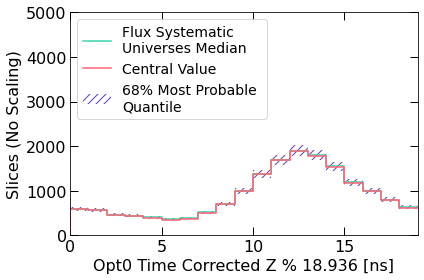

In [41]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#median
ax.step(bins, hnl_flx_median_plot, color = col_dict['Spearmint'], label = "Flux Systematic \nUniverses Median")
#-----------------------------------------------------------------#
#central value
ax.step(bins, hnl_dict['hnl_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#universe 1 sigma

bottom = hnl_dict['hnl_cv'] - hnl_dict['neg_flx_err']
peak = hnl_dict['hnl_cv'] + hnl_dict['pos_flx_err']
height = peak - bottom

plt. rcParams["hatch.color"] = col_dict['Mauve']
ax.bar(
        x = bins[:-1]
        , height= height
        , width = np.diff(bins)
        , bottom = bottom
        , align = 'edge'
        , hatch='///'
        , fc='w'
        , label = "68% Most Probable \nQuantile"
                        )

#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="upper left", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(hnl_ymin, hnl_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("hnl_beam_bucket_flux_weight_median68.png"), dpi=200)
plt.show()

<h3>Covariance Matrix</h3>

In [42]:
hnl_flux_cov, _ = get_cov_corr_matrix(hnl_dict['hnl_cv'], hnl_flx_universe)

(19,)
(1000, 19)


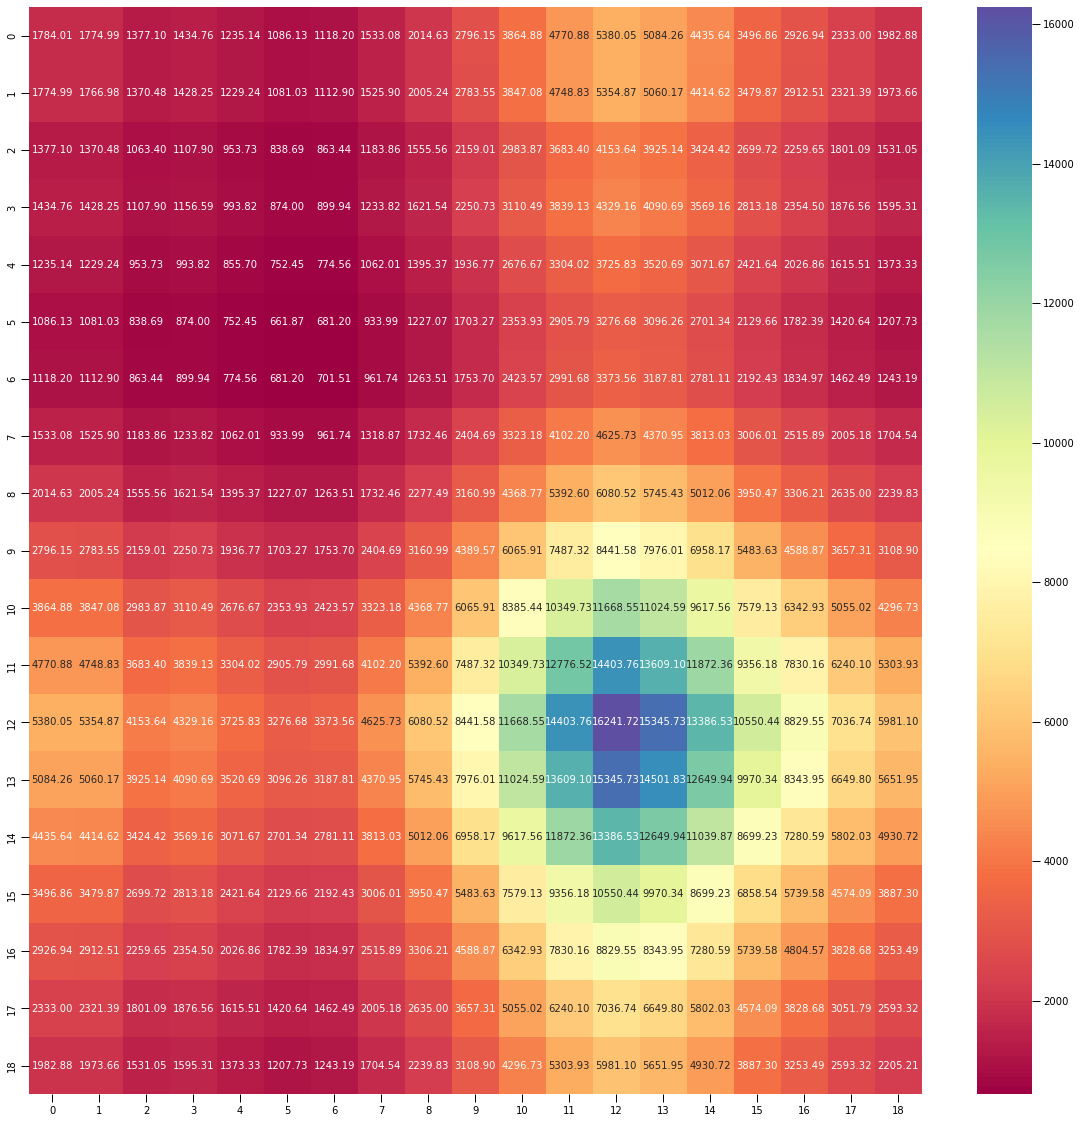

In [43]:
fig, ax = plt.subplots(1,1, figsize = (20, 20))

ax = sns.heatmap(hnl_flux_cov, annot=True, fmt='.2f', cmap = "Spectral")
plt.show()

In [44]:
hnl_dict['cov_flx_err'] = np.sqrt(np.diag(hnl_flux_cov))

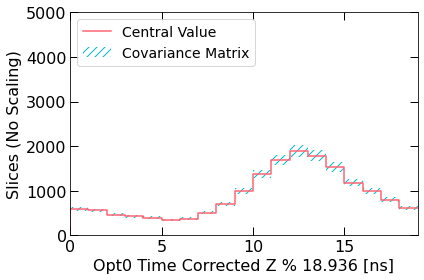

In [45]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

#-----------------------------------------------------------------#
#central value
ax.step(bins, hnl_dict['hnl_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")

#-----------------------------------------------------------------#
#covariance matrix

bottom = hnl_dict['hnl_cv'] - hnl_dict['cov_flx_err']
peak = hnl_dict['hnl_cv'] + hnl_dict['cov_flx_err']
height = peak - bottom

plt. rcParams["hatch.color"] = col_dict['Aqua']
ax.bar(
        x = bins[:-1]
        , height= height
        , width = np.diff(bins)
        , bottom = bottom
        , align = 'edge'
        , hatch='///'
        , fc='w'
        , label = "Covariance Matrix"
                        )

#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="upper left", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(hnl_ymin, hnl_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("hnl_beam_bucket_flux_weight_median68.png"), dpi=200)
plt.show()

<h3>Comparison</h3>

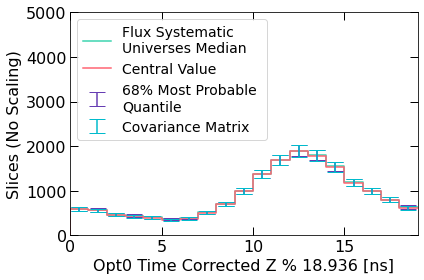

In [46]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#median
ax.step(bins, hnl_flx_median_plot, color = col_dict['Spearmint'], label = "Flux Systematic \nUniverses Median")
#-----------------------------------------------------------------#
#central value
ax.step(bins, hnl_dict['hnl_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#universe 1 sigma
ax.errorbar(bins_mid, hnl_dict['hnl_cv']
            , [hnl_dict['neg_flx_err'], hnl_dict['pos_flx_err']]
            , ls='none'
            , color = col_dict['Mauve']
            , capsize=8
            ,label = "68% Most Probable \nQuantile"
           )
#-----------------------------------------------------------------#
#covariance matrix
ax.errorbar(bins_mid, hnl_dict['hnl_cv']
            , [hnl_dict['cov_flx_err'], hnl_dict['cov_flx_err']]
            , ls='none'
            , color = col_dict['Aqua']
            , capsize=8
            ,label = "Covariance Matrix"
           )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="upper left", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(hnl_ymin, hnl_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("hnl_beam_bucket_flux_weight_median68.png"), dpi=200)
plt.show()

<h3>Neutrino</h3>

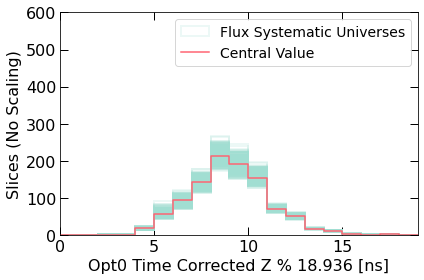

In [47]:
nu_flx_universe = []

fig, ax = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#-----------------------------------------------------------------#
#Universe
pltdf = df_nu['mod_t']

for i in range(0, 1000):
    weights = df_nu['flxw_{}'.format(i)]
    label = ''
    if i == 0:
        label = "Flux Systematic Universes"
        
    nu_n, _, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["PastelGreen"],
                            alpha = 0.2,
                            linestyle = "-",
                            linewidth = 2,
                            label = label
                        )
    nu_flx_universe.append(nu_n)
#-----------------------------------------------------------------#
#Central Value
ax.step(bins, nu_dict['nu_cv_plot']
         , color = col_dict['Flamingo']
         , label =  "Central Value"
        )
#-----------------------------------------------------------------#
ax.legend(loc = 'upper right',fontsize = 14)

plot_tick(ax, 16)
plot_title(ax, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_flux_weight_universe.png"), dpi=200)
plt.show()

In [48]:
nu_flx_universe = np.array(nu_flx_universe)
nu_flx_universe = np.sort(nu_flx_universe, axis = 0)

nu_flx_median, nu_flx_err = get_median_68_quantile(nu_dict['nu_cv'], nu_flx_universe)

#make array for plotting
nu_flx_median_plot = np.insert(nu_flx_median, 0, 0)

CV array
[  0   1   2   2  19  58  94 143 214 192 155  72  52  18  12   4   2   3
   1]
Weight array shape
(1000, 19)

 Median
[  0.           0.91168696   1.78058231   1.84172651  18.11776558
  58.62137252  91.66101953 141.02443405 212.34644515 188.17698725
 156.87011037  71.15537649  50.81579185  17.99676925  11.77521577
   3.79781723   1.9944697    3.18034813   0.88849607]

 Low 34.1 quantile
[  0.           0.80660161   1.57872021   1.71249715  16.25765927
  53.15921     83.81006875 130.45226446 198.33174249 174.56215541
 146.71337661  67.31072244  47.44745049  16.93287724  11.08855131
   3.38792794   1.91204397   3.01569937   0.7594796 ]

 High 34.1 quantile
[  0.           1.02314999   2.01169852   1.98464341  20.25572446
  65.21208614 100.52869648 151.97197702 227.6483879  203.42842713
 168.41957925  75.89334546  54.34751364  19.04186285  12.53803306
   4.256097     2.07610715   3.35994475   1.00192265]

 Standard Error
[[0.00000000e+00 1.93398394e-01 4.21279785e-01 2.87502845e-

In [49]:
nu_dict['neg_flx_err'] = nu_flx_err[0]
nu_dict['pos_flx_err'] = nu_flx_err[1]

nu_dict

{'nu_cv': array([  0,   1,   2,   2,  19,  58,  94, 143, 214, 192, 155,  72,  52,
         18,  12,   4,   2,   3,   1]),
 'nu_cv_plot': array([  0,   0,   1,   2,   2,  19,  58,  94, 143, 214, 192, 155,  72,
         52,  18,  12,   4,   2,   3,   1]),
 'bins': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 'bins_mid': array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 'neg_stat_err': array([ 0.        ,  1.        ,  1.41421356,  1.41421356,  4.35889894,
         7.61577311,  9.69535971, 11.95826074, 14.62873884, 13.85640646,
        12.4498996 ,  8.48528137,  7.21110255,  4.24264069,  3.46410162,
         2.        ,  1.41421356,  1.73205081,  1.        ]),
 'pos_stat_err': array([ 0.        ,  1.        ,  1.41421356,  1.41421356,  4.35889894,
         7.61577311,  9.69535971, 11.95826074, 14.62873884, 13.85640646,
        12.449899

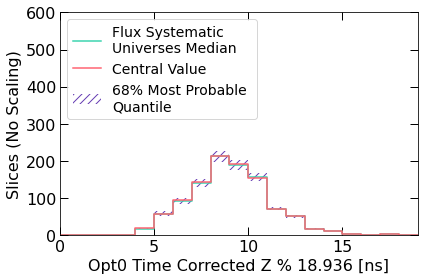

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#median
ax.step(bins, nu_flx_median_plot, color = col_dict['Spearmint'], label = "Flux Systematic \nUniverses Median")
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#universe 1 sigma

bottom = nu_dict['nu_cv'] - nu_dict['neg_flx_err']
peak = nu_dict['nu_cv'] + nu_dict['pos_flx_err']
height = peak - bottom

plt. rcParams["hatch.color"] = col_dict['Mauve']
ax.bar(
        x = bins[:-1]
        , height= height
        , width = np.diff(bins)
        , bottom = bottom
        , align = 'edge'
        , hatch='///'
        , fc='w'
        , label = "68% Most Probable \nQuantile"
                        )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="upper left", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_flux_weight_median68.png"), dpi=200)
plt.show()

<h3>Covariance Matrix </h3>

In [51]:
nu_flux_cov, _ = get_cov_corr_matrix(nu_dict['nu_cv'], nu_flx_universe)

(19,)
(1000, 19)


In [52]:
nu_dict['cov_flx_err'] = np.sqrt(np.diag(nu_flux_cov))

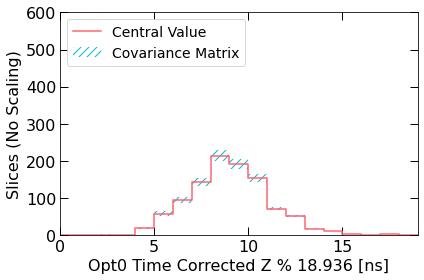

In [53]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")

#-----------------------------------------------------------------#
#covariance matrix

bottom = nu_dict['nu_cv'] - nu_dict['cov_flx_err']
peak = nu_dict['nu_cv'] + nu_dict['cov_flx_err']
height = peak - bottom

plt. rcParams["hatch.color"] = col_dict['Aqua']
ax.bar(
        x = bins[:-1]
        , height= height
        , width = np.diff(bins)
        , bottom = bottom
        , align = 'edge'
        , hatch='///'
        , fc='w'
        , label = "Covariance Matrix"
                        )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="upper left", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_flux_weight_median68.png"), dpi=200)
plt.show()

<h3>Comparison</h3>

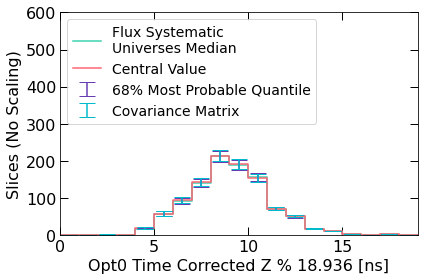

In [54]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#median
ax.step(bins, nu_flx_median_plot, color = col_dict['Spearmint'], label = "Flux Systematic \nUniverses Median")
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#universe 1 sigma
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_flx_err'] ,nu_dict['pos_flx_err']]
            , ls='none'
            , color = col_dict['Mauve']
            , capsize=8
            ,label = "68% Most Probable Quantile"
           )
#-----------------------------------------------------------------#
#covariance matrix
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['cov_flx_err'] ,nu_dict['cov_flx_err']]
            , ls='none'
            , color = col_dict['Aqua']
            , capsize=8
            ,label = "Covariance Matrix"
           )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="upper left", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_flux_weight_median68.png"), dpi=200)
plt.show()

In [55]:
df_hnl = df_hnl.loc[:,~df_hnl.columns.str.startswith('flxw_')]
df_nu = df_nu.loc[:,~df_nu.columns.str.startswith('flxw_')]

<h1>Cross Section Weights</h1>

In [92]:
# function to calculate the sum of an array
def quadratureSumArray(arr):
    print(arr)
    quadSum = 0
    
    for element in arr: 
        quadSum = quadSum + element**2
        
    return np.sqrt(quadSum)

In [56]:
def check_unisim(row):
    val = 1
    if len(row) > 0:
        val = row[0]
        if val == -9999:
            val = 1
    return val

def check_multisigma_neg1(row):
    val = 1
    if len(row) > 0:
        val = row[0]
        if val == -9999:  #cosmics
            val = 1
    return val

def check_multisigma_pos1(row):
    val = 1
    if len(row) > 0:
        val = row[1]
        if val == -9999: #cosmics
            val = 1
    return val

In [57]:
def make_df_xsecw(df):
    
    for name in unisim_list:
        df[name] = df[name].apply(lambda row: check_unisim(row))
    
    for name in multisigma_list:
        df[name+'_neg1'] = df[name].apply(lambda row: check_multisigma_neg1(row))
        df[name+'_pos1'] = df[name].apply(lambda row: check_multisigma_pos1(row))
        #df = df.drop([name], axis = 1)
    
    #explode array into columns
    df_xsecw = pd.DataFrame(df['slc_xsec_multisim_total'].tolist(),index=df.index).add_prefix('xsecw_')
    
    #drop column
    #df = df.drop(columns='slc_xsec_multisim_total')

    #merge 2 arrays together
    df = pd.concat([df, df_xsecw], axis = 1)
    
    #add nominal flux weight = 1
    df['xsec_nom'] = 1
    
    return df

<h3>Prep Work</h3>

In [58]:
df_nu = make_df_xsecw(df_nu)

#fill cosmic weight with 1
df_nu = df_nu.fillna(1)
df_nu

,index,run,subrun,event,slc_id,slc_comp,slc_flux_weight_expskin,slc_flux_weight_horncurrent,slc_flux_weight_kminus,slc_flux_weight_kplus,...,xsecw_491,xsecw_492,xsecw_493,xsecw_494,xsecw_495,xsecw_496,xsecw_497,xsecw_498,xsecw_499,xsec_nom
0,0,1,1398,2726,1,0.957983,"[0.9896853, 1.016631, 0.9899841, 1.0158724, 0....","[0.9992621, 1.003277, 0.9993158, 0.99906075, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.930681,0.740971,0.931584,1.525487,0.853534,1.231055,0.884576,0.859902,0.535673,1
1,1,1,1335,2774,1,0.988210,"[0.9918531, 1.0131357, 0.99208915, 1.0125365, ...","[0.9957701, 1.0028076, 0.996078, 0.9946162, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.008350,0.899654,0.957851,0.990242,0.966274,1.031639,0.957685,0.908167,0.931272,1
2,2,1,166,2751,0,1.000000,"[0.98360384, 1.0264366, 0.9840788, 1.0252305, ...","[0.99531144, 1.0042114, 0.99565274, 0.9940324,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.369467,0.789239,1.030210,0.829124,1.334973,0.912059,1.397341,0.556356,0.368119,1
3,3,1,20,4577,2,0.932299,"[0.8584293, 1.228263, 0.8625306, 1.2178499, 0....","[0.98392385, 1.0122006, 0.98509413, 0.9795383,...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.321392,1.068263,0.449753,0.926636,1.442234,0.987391,1.038376,1.727573,1.596779,1
4,4,1,19,2264,1,0.984322,"[0.9650692, 1.056321, 0.96608114, 1.0537517, 0...","[0.9956735, 1.007387, 0.9959884, 0.9944932, 0....","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.011764,0.946745,0.974533,0.987216,0.985220,1.019167,0.982767,0.953164,0.964210,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,393,1,4883,206,1,0.950540,"[0.9706941, 1.0472516, 0.97154313, 1.045096, 0...","[0.9951253, 1.0057919, 0.9954802, 0.9937955, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
1040,394,1,4884,212,0,0.998112,"[0.967574, 1.0522825, 0.96851337, 1.0498973, 0...","[0.998075, 1.0083754, 0.99821514, 0.9975499, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.9371223, 1.0646625, 0.8240639, 1.0550023, 1...",...,1.088030,0.879036,0.857267,0.803914,1.227573,0.945287,1.478204,0.352275,0.286190,1
1041,395,1,5887,74,2,1.000000,"[0.98179364, 1.0293553, 0.9823211, 1.0280161, ...","[0.9919417, 1.00147, 0.9925283, 0.9897434, 0.9...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
1042,396,1,5890,71,2,0.996000,"[0.83571, 1.2648947, 0.8404695, 1.2528105, 0.9...","[0.9873008, 1.0219469, 0.9882252, 0.9838365, 0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1


<h3>Uni Sim</h3>

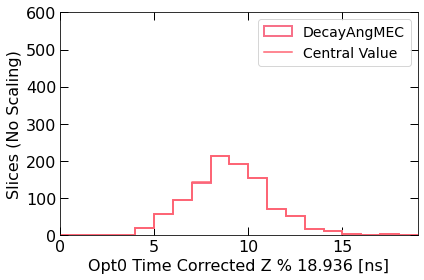

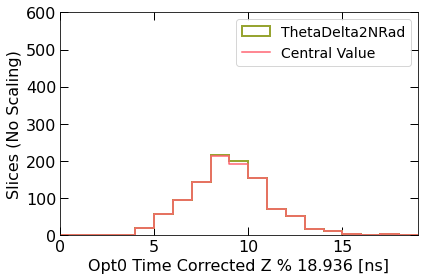

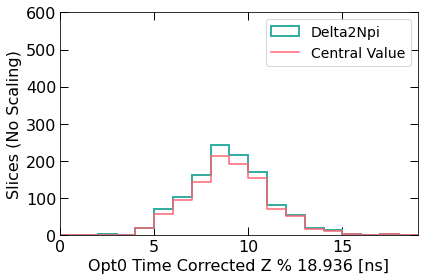

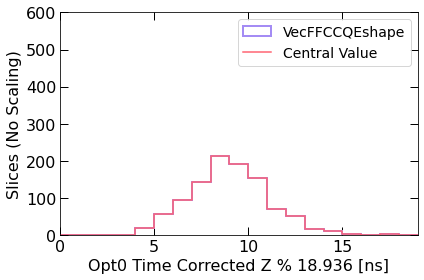

In [59]:
nu_unisim_arr = []
palette = sns.color_palette("husl", n_colors=len(unisim_list))

for name, p in zip(unisim_list, palette):
    fig, ax = plt.subplots(1,1, figsize = (6,4))

    xmin, xmax, xnbin = xmin, xmax, xnbin
    xlimmin, xlimmax = xmin, xmax
    #-----------------------------------------------------------------#
    #Universe
    pltdf = df_nu['mod_t']
    weights = df_nu['xsec_nom']

    weights = df_nu[name]
    
    nu_n, _, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = p, #col_dict["PastelGreen"],
                            #alpha = 0.2,
                            linestyle = "-",
                            linewidth = 2,
                            label = name.split("_")[-1]
                        )
    nu_unisim_arr.append(nu_n)
    
    #-----------------------------------------------------------------#
    #central value
    ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
    #-----------------------------------------------------------------#
    ax.legend(loc = 'upper right',fontsize = 14)

    plot_tick(ax, 16)
    plot_title(ax, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(nu_ymin, nu_ymax)
    #-----------------------------------------------------------------#
    fig.tight_layout()

    if ifSave:
        plt.savefig(savePath+str("nu_beam_bucket_unisim"+str(name)+"_xsec_weight_universe.png"), dpi=200)
    plt.show()

In [60]:
#Should be 4 unisim
nu_unisim_arr = np.array(nu_unisim_arr)
nu_unisim_err = nu_unisim_arr - nu_dict['nu_cv']

In [61]:
nu_dict['neg_xsec_unisim'] = np.maximum(0, - nu_unisim_err)
nu_dict['pos_xsec_unisim'] = np.maximum(0, nu_unisim_err)

print(len(nu_dict['neg_xsec_unisim']))

4


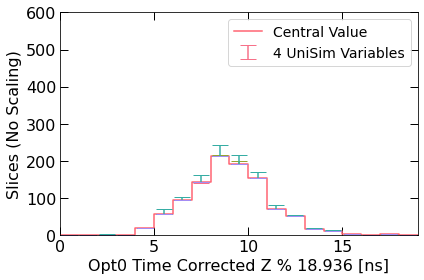

In [62]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")

#-----------------------------------------------------------------#
#universe 1 sigma
for i in range(0, nu_unisim_err.shape[0]):
    label = ""
    if i == 0:
        label = '4 UniSim Variables'
    ax.errorbar(bins_mid, nu_dict['nu_cv']
                , yerr=(nu_dict['neg_xsec_unisim'][i], nu_dict['pos_xsec_unisim'][i])
                , ls='none'
                , color = palette[i] #col_dict['Mauve']
                , capsize=8
                , label = label
                )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_unisim_1direction.png"), dpi=200)
plt.show()

In [63]:
nu_dict['nu_cv'] 

array([  0,   1,   2,   2,  19,  58,  94, 143, 214, 192, 155,  72,  52,
        18,  12,   4,   2,   3,   1])

In [64]:
print(hnl_flx_universe.shape)

(1000, 19)


In [65]:
nu_unisim_arr0 = nu_unisim_arr[2]
nu_unisim_arr0 = np.array(nu_unisim_arr0)
#nu_unisim_arr0 = np.transpose(nu_unisim_arr0)
nu_unisim_arr0 = nu_unisim_arr0.reshape(1, 19)
print(nu_unisim_arr0.shape)
print(nu_unisim_arr0)


(1, 19)
[[  0.           1.88428426   2.64243472   2.          20.86568999
   69.70743537 102.27674216 163.38756436 243.63495898 216.20552951
  171.69954163  81.91174459  54.91152501  18.43550205  13.0820694
    4.64449728   2.           3.           1.        ]]


In [66]:
cv = nu_dict['nu_cv']
universe = nu_unisim_arr0

print(cv)
print(universe)

[  0   1   2   2  19  58  94 143 214 192 155  72  52  18  12   4   2   3
   1]
[[  0.           1.88428426   2.64243472   2.          20.86568999
   69.70743537 102.27674216 163.38756436 243.63495898 216.20552951
  171.69954163  81.91174459  54.91152501  18.43550205  13.0820694
    4.64449728   2.           3.           1.        ]]


In [67]:
nu_diff = nu_dict['nu_cv'] - nu_unisim_arr0

nu_unisim0_cov = np.outer(nu_diff, nu_diff)
nu_unisim0_err = np.sqrt(np.diag(nu_unisim0_cov))


print(nu_diff)

print(nu_unisim0_cov)

print(nu_unisim0_err)

[[  0.          -0.88428426  -0.64243472   0.          -1.86568999
  -11.70743537  -8.27674216 -20.38756436 -29.63495898 -24.20552951
  -16.69954163  -9.91174459  -2.91152501  -0.43550205  -1.0820694
   -0.64449728   0.           0.           0.        ]]
[[ 0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  7.81958649e-01  5.68094906e-01 -0.00000000e+00
   1.64980029e+00  1.03527008e+01  7.31899280e+00  1.80284022e+01
   2.62057277e+01  2.14045687e+01  1.47671418e+01  8.76479971e+00
   2.57461573e+00  3.85107609e-01  9.56856934e-01  5.69918795e-01
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  5.68094906e-01  4.12722365e-01 -0.00000000e+00
   1.19858402e+00  7.52126292e+00  5.31726650e+0

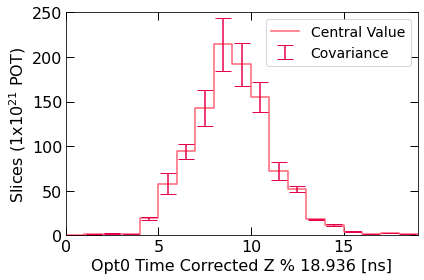

In [68]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")

#-----------------------------------------------------------------#
#covariance
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_unisim0_err, nu_unisim0_err],
            ls='none',
            color = col_dict['Coral'],
            capsize=8
            ,label = "Covariance"
           )

#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (1x10$^{21}$ POT)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, 250)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_combined.png"), dpi=200)
plt.show()

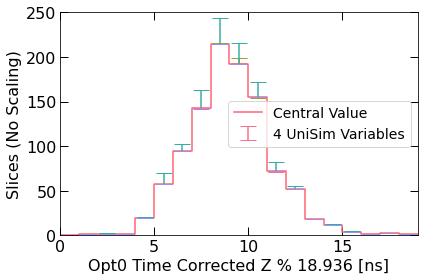

In [69]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")

#-----------------------------------------------------------------#
#universe 1 sigma
for i in range(0, nu_unisim_err.shape[0]):
    label = ""
    if i == 0:
        label = '4 UniSim Variables'
    ax.errorbar(bins_mid, nu_dict['nu_cv']
                , yerr=(nu_dict['neg_xsec_unisim'][i], nu_dict['pos_xsec_unisim'][i])
                , ls='none'
                , color = palette[i] #col_dict['Mauve']
                , capsize=8
                , label = label
                )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, 250)
#-----------------------------------------------------------------#
fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_unisim_1direction.png"), dpi=200)
plt.show()

<h3>Throw Universes with Unisim</h3>

(array([  1.,   1.,  23.,  62., 101., 115., 115.,  54.,  23.,   5.]),
 array([-3.86479353, -3.16775654, -2.47071955, -1.77368257, -1.07664558,
        -0.37960859,  0.3174284 ,  1.01446538,  1.71150237,  2.40853936,
         3.10557635]),
 <BarContainer object of 10 artists>)

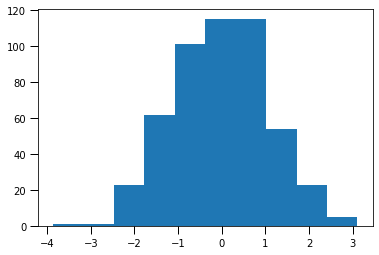

In [70]:
#make a random gaussian gun
mu, sigma = 0, 1 # mean and standard deviation
n_univ = len(df_nu['slc_xsec_multisim_total'][0])

random_arr = np.random.normal(mu, sigma, n_univ)
len_univ = np.arange(0, n_univ)
plt.hist(random_arr)

In [71]:
def unisim_throw(weight, random):
    return 1 + ( weight - 1) * 1 * random

In [72]:
for idx, r in zip(len_univ, random_arr):    
    #print(idx, r)
    for name in unisim_list:
        df_nu[name+'_{}'.format(idx)] = np.vectorize(unisim_throw)(df_nu[name], r)

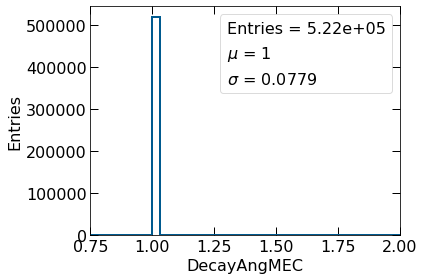

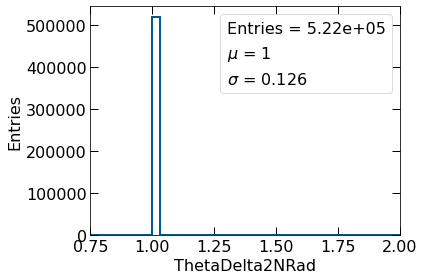

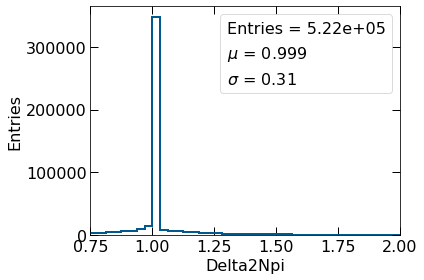

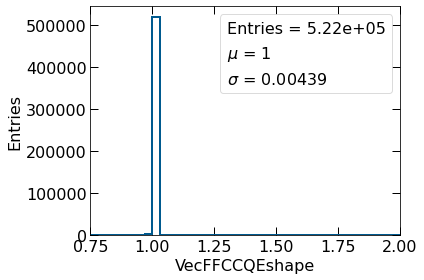

In [73]:
for name in unisim_list:

    pltdf = pd.DataFrame()
    for idx in len_univ:
        pltdf = pd.concat([pltdf, df_nu[name+'_{}'.format(idx)]]) 

    pltdf = pltdf.to_numpy()
    fig, ax1 = plt.subplots(1, figsize = (6,4))
    
    plot_1dhist( pltdf, 
                ax1,
                0.75, 2, 40,
                0.75, 2,
                ifnorm =False,
                histtype = 'step',
                linecolor = col_dict['Teal'], linewidth = 2,
                xtitle = name.split("_")[-1],
                ytitle = "Entries",  
                ifstatbox = True, loc = 'best'
                
                )
    fig.tight_layout()
    
    if ifSave:
        plt.savefig(savePath+name+".png", dpi=200)
        
    plt.show()
    

In [74]:
#Multiply into a single variable to plot covariance matrix later:
for idx in len_univ:
    df_nu['slc_xsec_total'+'_{}'.format(idx)] = 1
    df_nu['slc_xsec_unisim_total'+'_{}'.format(idx)] = 1
    df_nu['slc_xsec_multisigma_total'+'_{}'.format(idx)] = 1

In [75]:
for name in unisim_list:
    for idx in len_univ:
        df_nu['slc_xsec_total'+'_{}'.format(idx)] = df_nu['slc_xsec_total'+'_{}'.format(idx)] * df_nu[name+'_{}'.format(idx)]
        df_nu['slc_xsec_unisim_total'+'_{}'.format(idx)] = df_nu['slc_xsec_total'+'_{}'.format(idx)] * df_nu[name+'_{}'.format(idx)]    

In [76]:
for name in unisim_list:
    print(name)

slc_xsec_unisim_DecayAngMEC
slc_xsec_unisim_ThetaDelta2NRad
slc_xsec_unisim_Theta_Delta2Npi
slc_xsec_unisim_VecFFCCQEshape


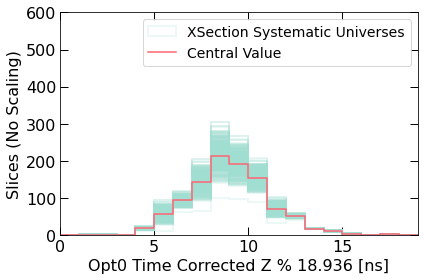

In [77]:
nu_xsec_universe = []

fig, ax = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#-----------------------------------------------------------------#
#Universe
pltdf = df_nu['mod_t']

for i in range(0, 500):
    weights = df_nu['slc_xsec_unisim_Theta_Delta2Npi_{}'.format(i)]
    label = ''
    
    if i == 0:
        label = "XSection Systematic Universes"
        
    nu_n, _, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["PastelGreen"],
                            alpha = 0.2,
                            linestyle = "-",
                            linewidth = 2,
                            label = label
                        )
    nu_xsec_universe.append(nu_n)
#-----------------------------------------------------------------#
#Central Value
ax.step(bins, nu_dict['nu_cv_plot']
         , color = col_dict['Flamingo']
         , label =  "Central Value"
        )
#-----------------------------------------------------------------#
ax.legend(loc = 'upper right',fontsize = 14)

plot_tick(ax, 16)
plot_title(ax, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_universe.png"), dpi=200)
plt.show()

In [78]:
nu_xsec_universe = np.array(nu_xsec_universe)
nu_xsec_universe = np.sort(nu_xsec_universe, axis = 0)

nu_xsec_cov, _ = get_cov_corr_matrix(nu_dict['nu_cv'], nu_xsec_universe)

unisim_err = np.sqrt(np.diag(nu_xsec_cov))

(19,)
(500, 19)


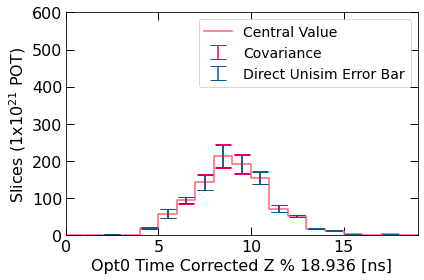

In [79]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")

#-----------------------------------------------------------------#
#covariance
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [unisim_err, unisim_err],
            ls='none',
            color = col_dict['Coral'],
            capsize=8
            ,label = "Covariance"
           )

#-----------------------------------------------------------------#
#covariance
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_unisim0_err, nu_unisim0_err],
            ls='none',
            color = col_dict['Teal'],
            capsize=8
            ,label = "Direct Unisim Error Bar"
           )
#-----------------------------------------------------------------#
#universe 1 sigma
#ax.errorbar(bins_mid, nu_dict['nu_cv']
#            , [nu_dict['neg_xsec_quadSum'], nu_dict['pos_xsec_quadSum']],
#            ls='none',
#            color = col_dict['Mauve'],
#            capsize=8
#            ,label = "Quadrature Sum"
#           )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (1x10$^{21}$ POT)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, 600)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_combined.png"), dpi=200)
plt.show()

In [80]:
for name in unisim_list:
    df_nu = df_nu.loc[:,~df_nu.columns.str.startswith(name+'_')]

<h3>Multi Sigma - Take 1 Sigma Directly</h3>

In [81]:
for name in multisigma_list:
    
    df_nu[name+"_pos1"] =  df_nu[name+"_pos1"].fillna(1)
    df_nu[name+"_neg1"] =  df_nu[name+"_neg1"].fillna(1)

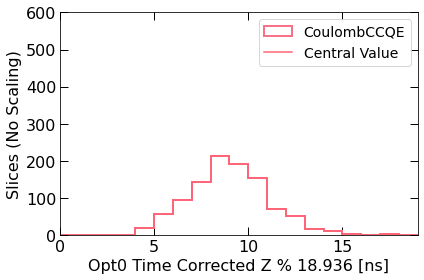

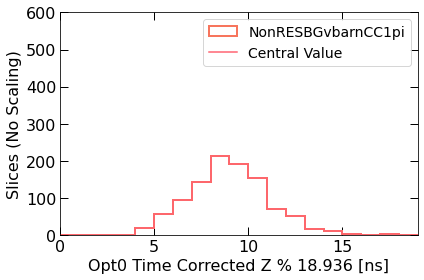

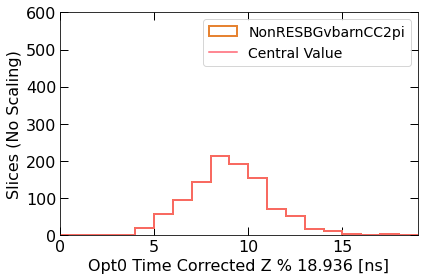

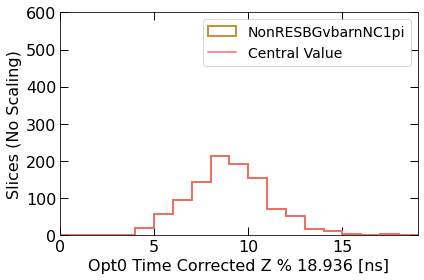

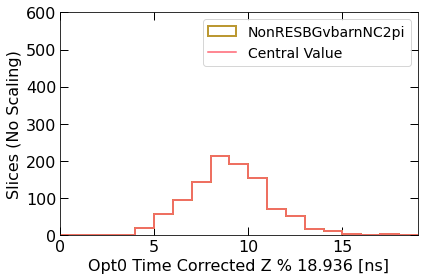

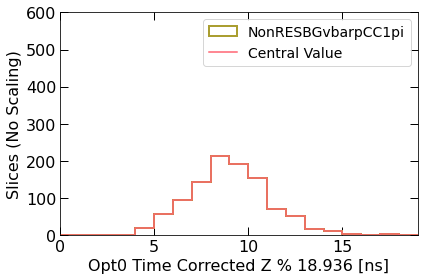

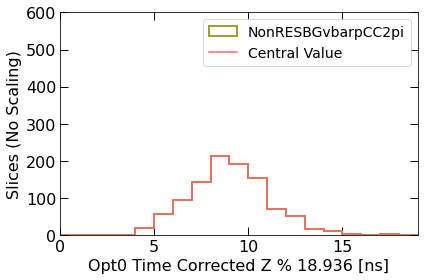

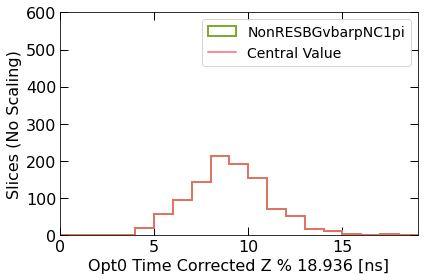

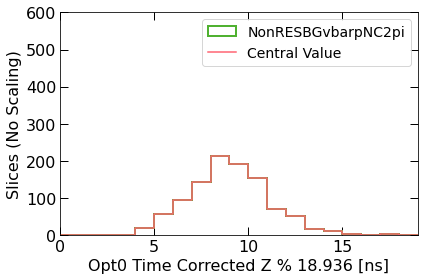

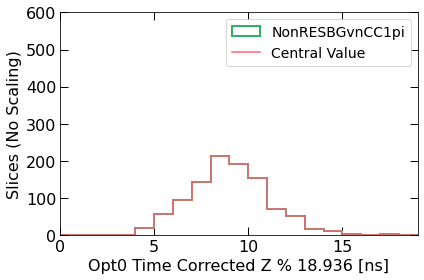

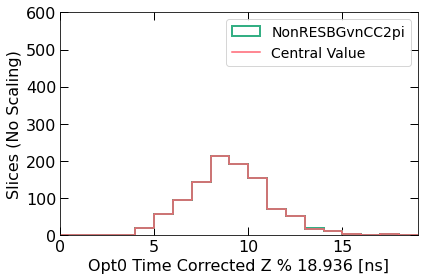

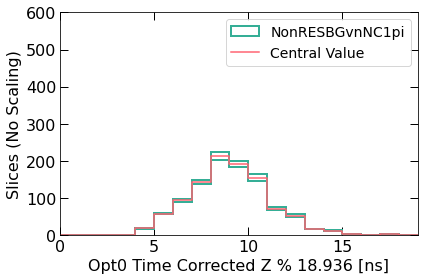

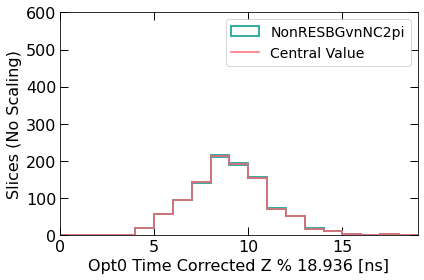

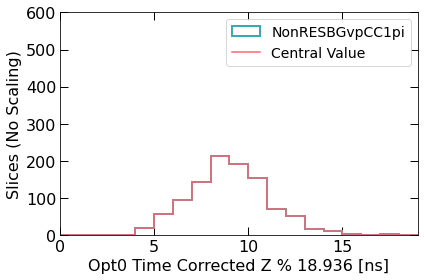

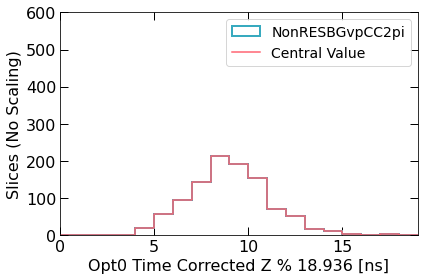

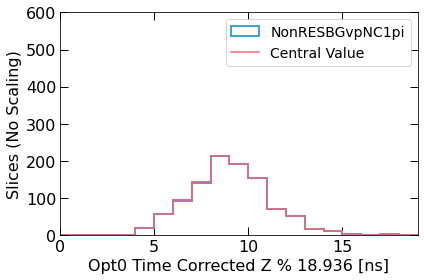

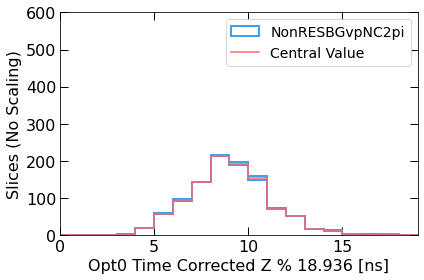

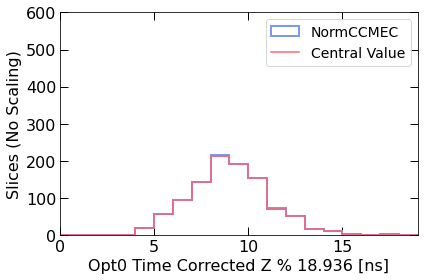

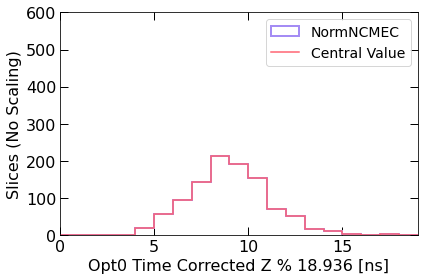

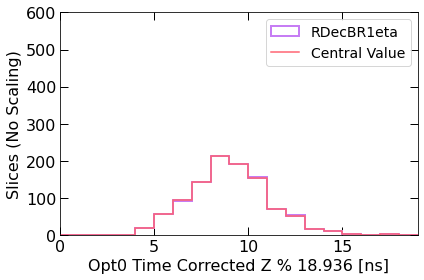

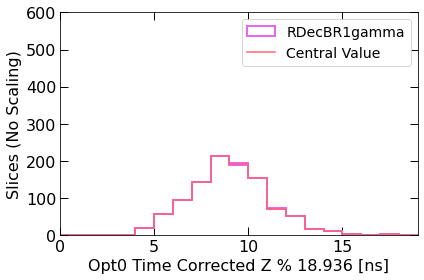

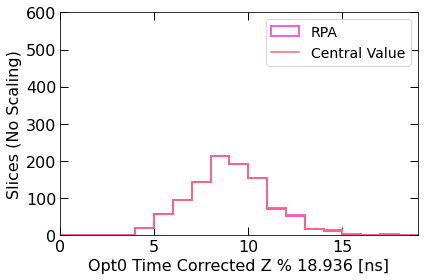

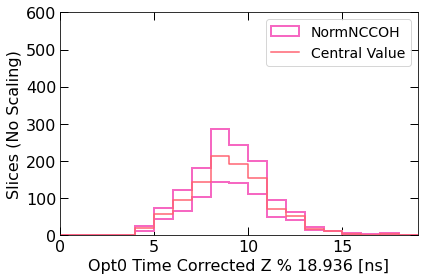

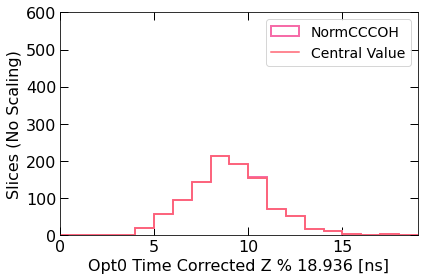

In [82]:
nu_multisigma_pos1_arr = []
nu_multisigma_neg1_arr = []

palette = sns.color_palette("husl", n_colors=len(multisigma_list))
    
for name, p in zip(multisigma_list, palette):

    fig, ax = plt.subplots(1,1, figsize = (6,4))

    xmin, xmax, xnbin = xmin, xmax, xnbin
    xlimmin, xlimmax = xmin, xmax
    #-----------------------------------------------------------------#
    pltdf = df_nu['mod_t']
        
    #-----------------------------------------------------------------#
    weights = df_nu[name+"_pos1"]
    label = name.split("_")[3]
    
    nu_n, _, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = p, #col_dict["PastelGreen"],
                            #alpha = 0.2,
                            linestyle = "-",
                            linewidth = 2,
                            label = label #+" +1 sigma"
                        )
    nu_multisigma_pos1_arr.append(nu_n)
    #-----------------------------------------------------------------#
    #for name in multisigma_list:
    weights = df_nu[name+"_neg1"]
    label = name.split("_")[3]
    
    nu_n, _, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = p, #col_dict["Purple"],
                            #alpha = 0.2,
                            linestyle = "-",
                            linewidth = 2,
                            #label = label +" -1 sigma"
                        )
    nu_multisigma_neg1_arr.append(nu_n)
        
    #-----------------------------------------------------------------#
    #central value
    ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")

    #-----------------------------------------------------------------#

    ax.legend(loc = 'best',fontsize = 14)
    #ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol =2)

    plot_tick(ax, 16)
    plot_title(ax, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(nu_ymin, nu_ymax)
    #-----------------------------------------------------------------#
    fig.tight_layout()

    if ifSave:
        plt.savefig(savePath+str("nu_beam_bucket_multisigma_xsec_weight_universe"+name+".png"), dpi=200)
    plt.show()

In [83]:
print(len(multisigma_list))

24


In [84]:
print(len(nu_multisigma_neg1_arr))
print(len(nu_multisigma_pos1_arr))

24
24


In [85]:
nu_multisigma_neg1_sort_arr = []
nu_multisigma_pos1_sort_arr = []

for neg,pos in zip(nu_multisigma_neg1_arr, nu_multisigma_pos1_arr):

    neg_arr = []
    pos_arr = []
    
    for negItem, posItem in zip(neg, pos):
        neg_arr.append(min(negItem, posItem))
        pos_arr.append(max(negItem, posItem))
        
    nu_multisigma_neg1_sort_arr.append(neg_arr)
    nu_multisigma_pos1_sort_arr.append(pos_arr)

#print(nu_multisigma_neg1_sort_arr)
#for neg,pos in zip(nu_multisigma_neg1_sort_arr, nu_multisigma_pos1_sort_arr):
#    print()
#    print(neg)
#    print(pos)

In [86]:
#Negative
nu_multisigma_neg1_err = abs(nu_dict['nu_cv'] - nu_multisigma_neg1_sort_arr)

#Positve
nu_multisigma_pos1_err = abs(nu_dict['nu_cv'] - nu_multisigma_pos1_sort_arr)

In [87]:
nu_dict['neg_xsec_multisigma'] = nu_multisigma_neg1_err
nu_dict['pos_xsec_multisigma'] = nu_multisigma_pos1_err

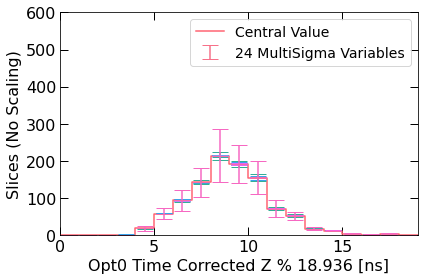

In [88]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

#-----------------------------------------------------------------#

#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#

#universe 1 sigma
for i,p in zip(range(0, len(multisigma_list)), palette):
    label = ""
    if i == 0:
        label = '24 MultiSigma Variables'
    ax.errorbar(bins_mid
                , nu_dict['nu_cv']
                , [nu_dict['neg_xsec_multisigma'][i],nu_dict['pos_xsec_multisigma'][i]]
                , ls='none'
                , color = p #col_dict['Mauve']
                , capsize=8
                , label = label
               )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_multisigma_1sigband.png"), dpi=200)
plt.show()

In [89]:
multisigma_neg_err = []
multisigma_neg_err = np.array(multisigma_neg_err)
multisigma_neg_err = multisigma_neg_err.reshape(0, 19)
multisigma_neg_err = np.append(multisigma_neg_err, nu_dict['neg_xsec_multisigma'], axis = 0)
print(nu_dict['neg_xsec_multisigma'].shape)
print(multisigma_neg_err.shape)

(24, 19)
(24, 19)


In [90]:
multisigma_pos_err = []
multisigma_pos_err = np.array(multisigma_pos_err)
multisigma_pos_err = multisigma_pos_err.reshape(0, 19)
multisigma_pos_err = np.append(multisigma_pos_err, nu_dict['pos_xsec_multisigma'], axis = 0)
print(nu_dict['neg_xsec_multisigma'].shape)
print(multisigma_pos_err.shape)

(24, 19)
(24, 19)


In [94]:
multisigma_neg_quadSum = np.apply_along_axis(quadratureSumArray, axis=0, arr=multisigma_neg_err)

multisigma_pos_quadSum = np.apply_along_axis(quadratureSumArray, axis=0, arr=multisigma_pos_err)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00301808 0.         0.         0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0005005  0.00301808 0.         0.         0.        ]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.
 0.  0.  0.  0.  0.  0. ]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.50000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.00000000e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.51257420e-03
 2.11265683e-02 0.00000000e+00 7.

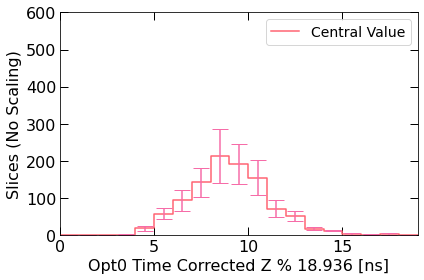

In [122]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))

#-----------------------------------------------------------------#

#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#

ax.errorbar(bins_mid
                , nu_dict['nu_cv']
                , [multisigma_neg_quadSum , multisigma_pos_quadSum]
                , ls='none'
                , color = p #col_dict['Mauve']
                , capsize=8
                , label = label
               )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()
if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_multisigma_1sigband.png"), dpi=200)
plt.show()

<h3>Multi Sigma - TODO: Throw Universe Using TSpline and Construct Covariance Matrix</h3>

In [96]:
def throw_universe_tspline(spline, random):
    
    if len(spline) == 0:
        spline = [1, 1, 1, 1, 1, 1]
        
    xs = [-1, 1, -2, 2, -3, 3]
    ys = spline
    
    tsp = ROOT.TSpline3("myspline", array.array('d', xs), array.array('d', ys), len(xs))
    weight = tsp.Eval(random)

    return weight

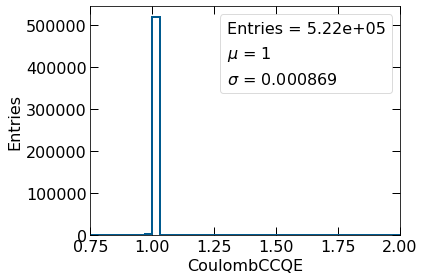

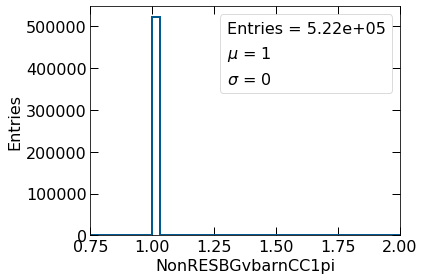

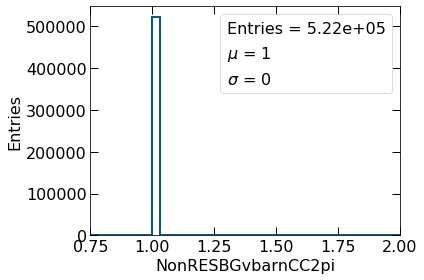

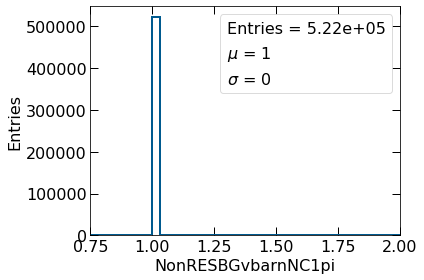

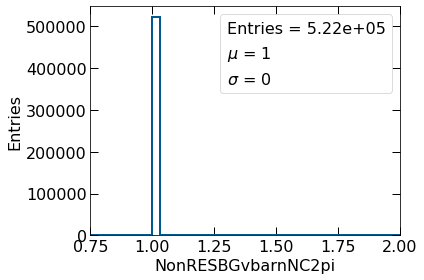

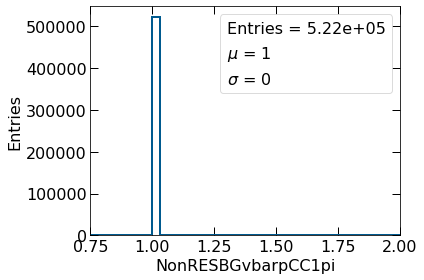

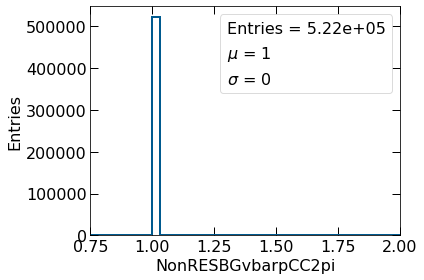

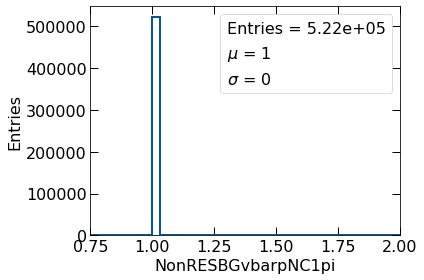

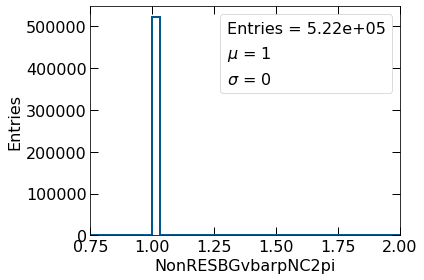

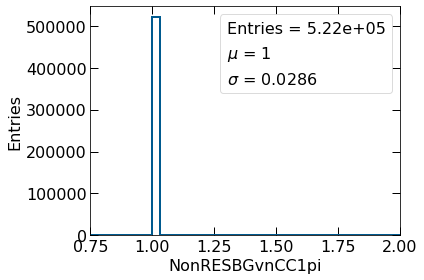

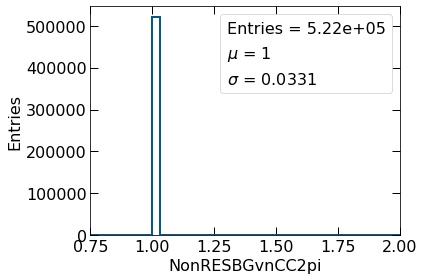

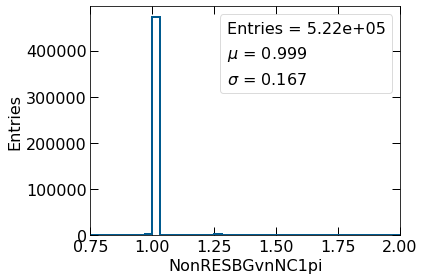

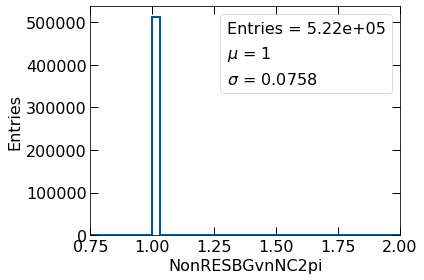

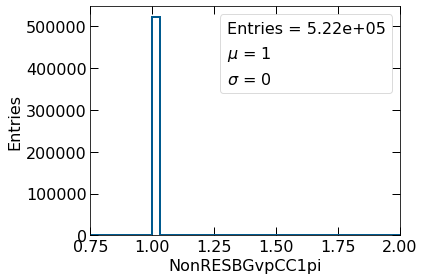

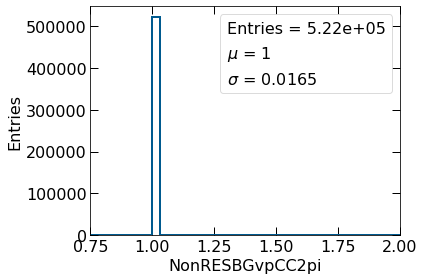

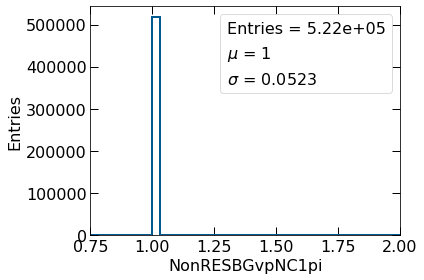

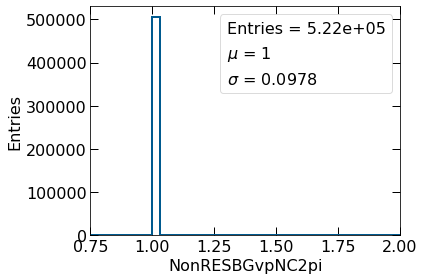

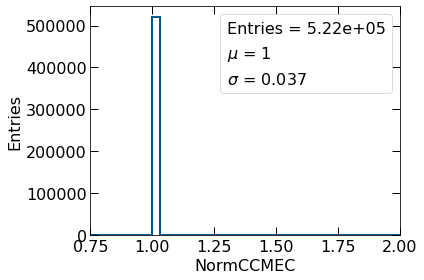

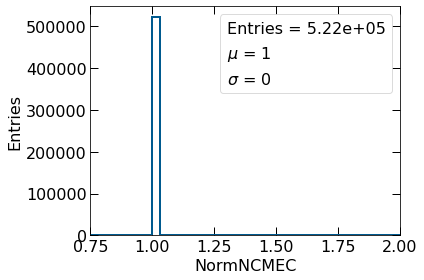

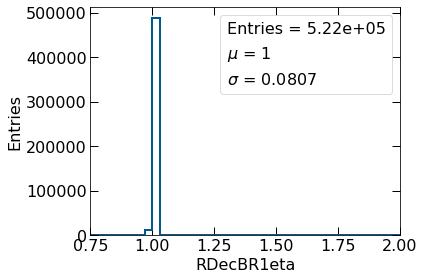

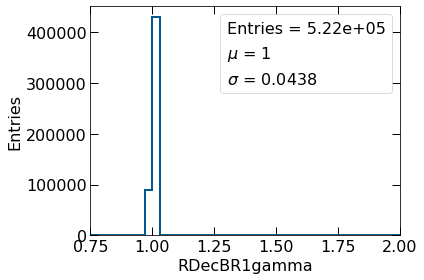

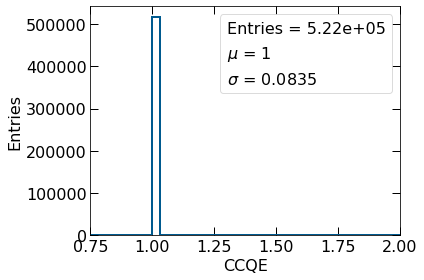

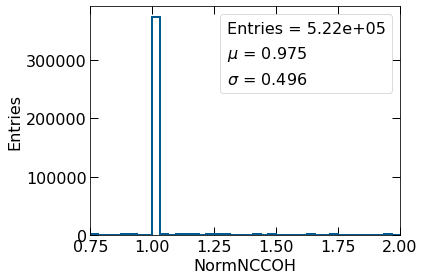

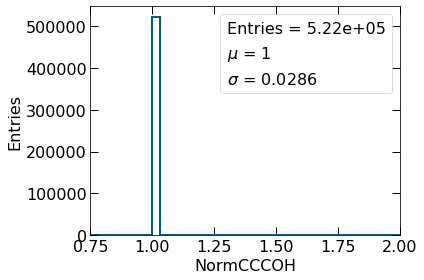

In [97]:
for name in multisigma_list:
    
    pltdf = pd.DataFrame()

    for idx, r in zip(len_univ, random_arr):
        df_nu[name+'_{}'.format(idx)] = df_nu[name].apply(lambda row: throw_universe_tspline(row, r))
        
        #for plotting
        pltdf = pd.concat([pltdf, df_nu[name+'_{}'.format(idx)]]) 
        
        #multiply all the weight
        df_nu['slc_xsec_total_{}'.format(idx)] = df_nu['slc_xsec_total_{}'.format(idx)] * df_nu[name+'_{}'.format(idx)]
        #multiply all the weight
        df_nu['slc_xsec_multisigma_total_{}'.format(idx)] = df_nu['slc_xsec_multisigma_total_{}'.format(idx)] * df_nu[name+'_{}'.format(idx)]

    #drop them
    df_nu = df_nu.loc[:,~df_nu.columns.str.startswith(name+'_')]
    
    #plot them please
    pltdf = pltdf.to_numpy()
    fig, ax1 = plt.subplots(1, figsize = (6,4))
    
    plot_1dhist( pltdf, 
                ax1,
                0.75, 2, 40,
                0.75, 2,
                ifnorm =False,
                histtype = 'step',
                linecolor = col_dict['Teal'], linewidth = 2,
                xtitle = name.split("_")[-1],
                ytitle = "Entries",  
                ifstatbox = True, loc = 'best'
                
                )
    fig.tight_layout()
    
    if ifSave:
        plt.savefig(savePath+name+".png", dpi=200)
        
    plt.show()
    
    #==================================================

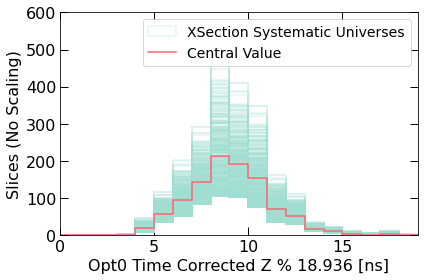

In [99]:
nu_xsec_universe = []

fig, ax = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#-----------------------------------------------------------------#
#Universe
pltdf = df_nu['mod_t']

for i in range(0, 500):
    weights = df_nu['slc_xsec_multisigma_total_{}'.format(i)]
    label = ''
    
    if i == 0:
        label = "XSection Systematic Universes"
        
    nu_n, _, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["PastelGreen"],
                            alpha = 0.2,
                            linestyle = "-",
                            linewidth = 2,
                            label = label
                        )
    nu_xsec_universe.append(nu_n)
#-----------------------------------------------------------------#
#Central Value
ax.step(bins, nu_dict['nu_cv_plot']
         , color = col_dict['Flamingo']
         , label =  "Central Value"
        )
#-----------------------------------------------------------------#
ax.legend(loc = 'upper right',fontsize = 14)

plot_tick(ax, 16)
plot_title(ax, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_universe.png"), dpi=200)
plt.show()

In [100]:
nu_xsec_universe = np.array(nu_xsec_universe)
nu_xsec_universe = np.sort(nu_xsec_universe, axis = 0)

nu_xsec_cov, _ = get_cov_corr_matrix(nu_dict['nu_cv'], nu_xsec_universe)

multisigma_err = np.sqrt(np.diag(nu_xsec_cov))

(19,)
(500, 19)


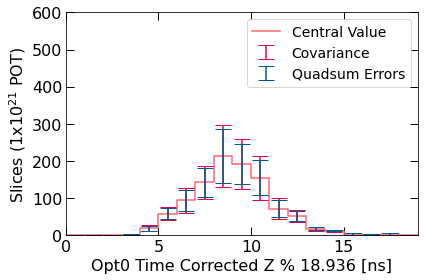

In [124]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")

#-----------------------------------------------------------------#
#covariance
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [multisigma_err, multisigma_err],
            ls='none',
            color = col_dict['Coral'],
            capsize=8
            ,label = "Covariance"
           )
#-----------------------------------------------------------------#
ax.errorbar(bins_mid
                , nu_dict['nu_cv']
                , [multisigma_neg_quadSum , multisigma_pos_quadSum]
                , ls='none'
                , color = col_dict['Teal']
                , capsize=8
                , label = "Quadsum Errors"
               )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (1x10$^{21}$ POT)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_combined.png"), dpi=200)
plt.show()

<h3>Multi Sim</h3>

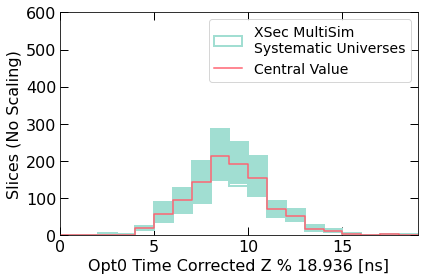

In [102]:
nu_xsec_multisim_universe = []

fig, ax = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#-----------------------------------------------------------------#
#Universe
pltdf = df_nu['mod_t']

for i in range(0, 500):
    weights = df_nu['xsecw_{}'.format(i)]
    label = ''
    if i == 0:
        label = "XSec MultiSim \nSystematic Universes"
        
    nu_n, _, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["PastelGreen"],
                            linestyle = "-",
                            linewidth = 2,
                            label = label
                        )
    nu_xsec_multisim_universe.append(nu_n)
    
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")

#-----------------------------------------------------------------#
ax.legend(loc = 'upper right',fontsize = 14)

plot_tick(ax, 16)
plot_title(ax, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_multisim_weight_universe.png"), dpi=200)
plt.show()

In [103]:
nu_xsec_multisim_universe = np.array(nu_xsec_multisim_universe)
nu_xsec_multisim_universe = np.sort(nu_xsec_multisim_universe, axis = 0)

nu_xsec_multisim_median, nu_xsec_multisim_err = get_median_68_quantile(nu_dict['nu_cv'], nu_xsec_multisim_universe)

#make array for plotting
nu_xsec_multisim_median_plot = np.insert(nu_xsec_multisim_median, 0, 0)

CV array
[  0   1   2   2  19  58  94 143 214 192 155  72  52  18  12   4   2   3
   1]
Weight array shape
(500, 19)

 Median
[  0.           0.90485835   1.89665183   1.92716384  18.87941945
  57.40673672  93.63129027 142.16015691 212.92456439 189.84881411
 153.79444073  71.59216459  51.6447535   18.58774716  11.80972041
   3.96581832   1.99503434   3.           0.93916321]

 Low 34.1 quantile
[  0.           0.62125324   1.22604999   1.3184204   16.98646561
  50.19686863  82.05531944 121.41810539 189.04702193 170.31255949
 135.06058564  63.62453247  46.51335413  16.45065818  10.81328553
   3.5725141    1.94879638   3.           0.        ]

 High 34.1 quantile
[  0.           1.29376672   2.67494633   2.57010479  20.85248084
  67.17184732 106.28232063 163.36841137 237.37228038 211.54074886
 173.7328561   79.40196779  57.80427921  21.57421769  12.93271295
   4.40650378   2.03041233   3.           1.95878064]

 Standard Error
[[ 0.          0.37874676  0.77395001  0.6815796   2.0135343

In [104]:
nu_dict['neg_xsec_multisim'] = nu_xsec_multisim_err[0]
nu_dict['pos_xsec_multisim'] = nu_xsec_multisim_err[1]
nu_dict

{'nu_cv': array([  0,   1,   2,   2,  19,  58,  94, 143, 214, 192, 155,  72,  52,
         18,  12,   4,   2,   3,   1]),
 'nu_cv_plot': array([  0,   0,   1,   2,   2,  19,  58,  94, 143, 214, 192, 155,  72,
         52,  18,  12,   4,   2,   3,   1]),
 'bins': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 'bins_mid': array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5]),
 'neg_stat_err': array([ 0.        ,  1.        ,  1.41421356,  1.41421356,  4.35889894,
         7.61577311,  9.69535971, 11.95826074, 14.62873884, 13.85640646,
        12.4498996 ,  8.48528137,  7.21110255,  4.24264069,  3.46410162,
         2.        ,  1.41421356,  1.73205081,  1.        ]),
 'pos_stat_err': array([ 0.        ,  1.        ,  1.41421356,  1.41421356,  4.35889894,
         7.61577311,  9.69535971, 11.95826074, 14.62873884, 13.85640646,
        12.449899

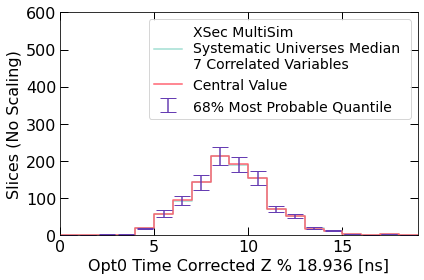

In [105]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#median
ax.step(bins, nu_xsec_multisim_median_plot, color = col_dict['PastelGreen'], label = "XSec MultiSim \nSystematic Universes Median \n7 Correlated Variables")
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#universe 1 sigma
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , nu_xsec_multisim_err
            , ls='none'
            , color = col_dict['Mauve']
            , capsize=8
            ,label = "68% Most Probable Quantile"
           )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_multisim_weight_median68.png"), dpi=200)
plt.show()

<h3>Covarariance Matrix</h3>

In [106]:
nu_xsec_multisim_cov, _ = get_cov_corr_matrix(nu_dict['nu_cv'], nu_xsec_multisim_universe)

(19,)
(500, 19)


In [107]:
nu_dict['cov_xsec_multisim_err'] = np.sqrt(np.diag(nu_xsec_multisim_cov))

<h3>Comparison</h3>

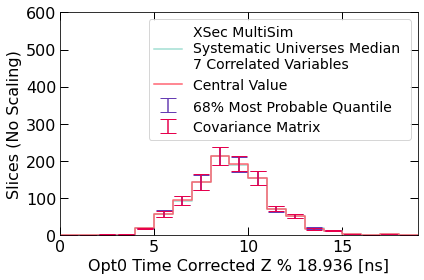

In [140]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#median
ax.step(bins, nu_xsec_multisim_median_plot, color = col_dict['PastelGreen'], label = "XSec MultiSim \nSystematic Universes Median \n7 Correlated Variables")
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#universe 1 sigma
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , nu_xsec_multisim_err
            , ls='none'
            , color = col_dict['Mauve']
            , capsize=8
            ,label = "68% Most Probable Quantile"
           )

#-----------------------------------------------------------------#
#universe 1 sigma
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , nu_dict['cov_xsec_multisim_err']
            , ls='none'
            , color = col_dict['Coral']
            , capsize=8
            ,label = "Covariance Matrix"
           )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_multisim_weight_median68.png"), dpi=200)
plt.show()

<h3> Quadrature Sum All Xsec Systematics </h3>

In [146]:
def quadratureSumArray(arr):
    
    quadSum = 0
    
    for element in arr: 
        quadSum = quadSum + element**2
        
    return np.sqrt(quadSum)

In [147]:
#Negative
nu_dict['neg_xsec_multisim'] = nu_dict['neg_xsec_multisim'].reshape(1,19)

nu_xsec_neg = []
nu_xsec_neg = np.append(nu_dict['neg_xsec_multisim'], nu_dict['neg_xsec_multisigma'], axis=0)
nu_xsec_neg = np.append(nu_xsec_neg, nu_dict['neg_xsec_unisim'], axis=0)

nu_xsec_neg_quadSum = np.apply_along_axis(quadratureSumArray, axis=0, arr=nu_xsec_neg)


nu_dict['neg_xsec_quadSum'] = nu_xsec_neg_quadSum

In [152]:
#Positive
nu_dict['pos_xsec_multisim'] = nu_dict['pos_xsec_multisim'].reshape(1,19)

nu_xsec_pos = []
nu_xsec_pos = np.append(nu_dict['pos_xsec_multisim'], nu_dict['pos_xsec_multisigma'], axis=0)
nu_xsec_pos = np.append(nu_xsec_pos, nu_dict['pos_xsec_unisim'], axis = 0)
print(nu_xsec_pos.shape)

nu_xsec_pos_quadSum = np.apply_along_axis(quadratureSumArray, axis=0, arr=nu_xsec_pos)

print(nu_xsec_pos_quadSum.shape)


nu_dict['pos_xsec_quadSum'] = nu_xsec_pos_quadSum

(29, 19)
(19,)
14.611832928807072
[0.00000000e+00 3.01814079e-03 3.05936823e-03 5.00000000e-01
 7.17638159e+00 1.51883930e+01 2.83373566e+01 3.93760508e+01
 7.20111304e+01 5.28714486e+01 4.64029164e+01 2.23659900e+01
 1.30894961e+01 4.15399687e+00 2.02331558e+00 2.06155502e+00
 1.11803399e+00 3.00000000e+00 5.00000000e-01]


In [161]:
print(nu_xsec_pos_quadSum[8])
print(nu_dict['pos_xsec_quadSum'][8])

print(multisigma_pos_quadSum[8])
print(unisim_err[8])
print(nu_dict['cov_xsec_multisim_err'][8])

81.31619305127171
81.31619305127171
72.01113043762454
31.713227855042224
23.642277707090795


In [162]:
print(np.sqrt(72**2 + 31**2 + 23**2))

81.69455306200041


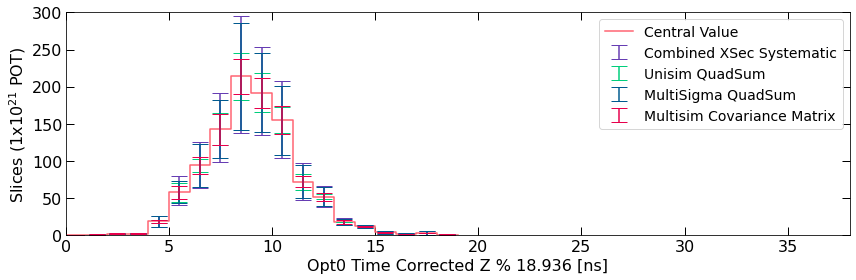

In [164]:
fig, ax = plt.subplots(1, 1, figsize = (12, 4))
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#universe 1 sigma
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_xsec_quadSum'], nu_dict['pos_xsec_quadSum']],
            ls='none',
            color = col_dict['Mauve'],
            capsize=8
            ,label = "Combined XSec Systematic"
           )

#-----------------------------------------------------------------#
ax.errorbar(bins_mid
                , nu_dict['nu_cv']
                , [unisim_err , unisim_err]
                , ls='none'
                , color = col_dict['MintGreen']
                , capsize=8
                , label = "Unisim QuadSum"
               )
#-----------------------------------------------------------------#
ax.errorbar(bins_mid
                , nu_dict['nu_cv']
                , [multisigma_neg_quadSum , multisigma_pos_quadSum]
                , ls='none'
                , color = col_dict['Teal']
                , capsize=8
                , label = "MultiSigma QuadSum"
               )

#-----------------------------------------------------------------#
#universe 1 sigma
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , nu_dict['cov_xsec_multisim_err']
            , ls='none'
            , color = col_dict['Coral']
            , capsize=8
            ,label = "Multisim Covariance Matrix"
           )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (1x10$^{21}$ POT)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax*2)
ax.set_ylim(nu_ymin, 300)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_combined.png"), dpi=200)
plt.show()

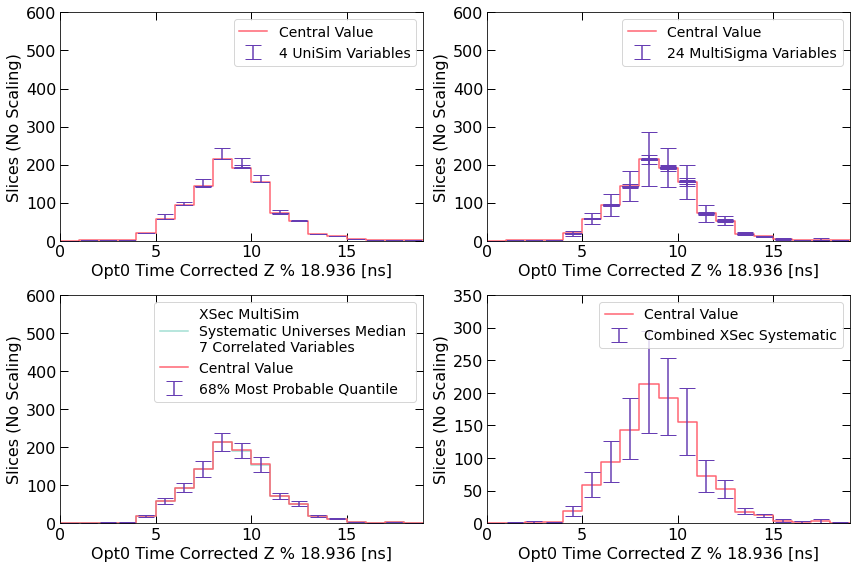

In [121]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (12,8))#, sharex = True, sharey = True)

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#========================================================================#
#UNISIM
#central value
ax1.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#TODO: CURRENTLY PLOTTING 
#universe 1 sigma
for i in range(0, nu_unisim_err.shape[0]):
    label = ""
    if i == 0:
        label = '4 UniSim Variables'
    ax1.errorbar(bins_mid, nu_dict['nu_cv']
                , yerr=(np.maximum(0, - nu_unisim_err[i]), np.maximum(0, nu_unisim_err[i]))
                , ls='none'
                , color = col_dict['Mauve']
                , capsize=8
                , label = label
                )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax1,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax1, 16)

ax1.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(nu_ymin, nu_ymax)

#========================================================================#
#MULTISIGMA
#central value
ax2.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#

#universe 1 sigma
for i in range(0, nu_multisigma_neg1_err.shape[0]):
    label = ""
    if i == 0:
        label = '24 MultiSigma Variables'
    ax2.errorbar(bins_mid
                , nu_dict['nu_cv']
                , [nu_dict['neg_xsec_multisigma'][i],nu_dict['pos_xsec_multisigma'][i]]
                , ls='none'
                , color = col_dict['Mauve']
                , capsize=8
                , label = label
               )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax2,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax2, 16)

ax2.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(nu_ymin, nu_ymax)

#========================================================================#
#MULTISIM
#median
ax3.step(bins, nu_xsec_multisim_median_plot, color = col_dict['PastelGreen'], label = "XSec MultiSim \nSystematic Universes Median \n7 Correlated Variables")
#-----------------------------------------------------------------#
#central value
ax3.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#universe 1 sigma
ax3.errorbar(bins_mid, nu_dict['nu_cv']
            , nu_xsec_multisim_err
            , ls='none'
            , color = col_dict['Mauve']
            , capsize=8
            ,label = "68% Most Probable Quantile"
           )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax3,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax3, 16)

ax3.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax3.set_xlim(xmin, xmax)
ax3.set_ylim(nu_ymin, nu_ymax)

#========================================================================#
#COMBINED
#central value
ax4.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#universe 1 sigma
ax4.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_xsec_quadSum'], nu_dict['pos_xsec_quadSum']],
            ls='none',
            color = col_dict['Mauve'],
            capsize=8
            ,label = "Combined XSec Systematic"
           )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax4,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax4, 16)

ax4.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax4.set_xlim(xmin, xmax)
ax4.set_ylim(nu_ymin, 350)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_all.png"), dpi=200)
plt.show()

<h1>Covariance matrix everything!</h1>

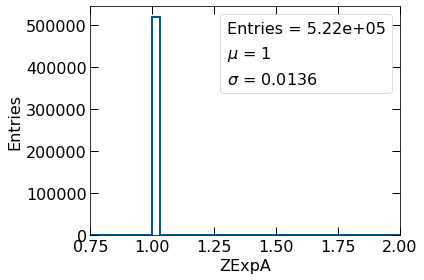

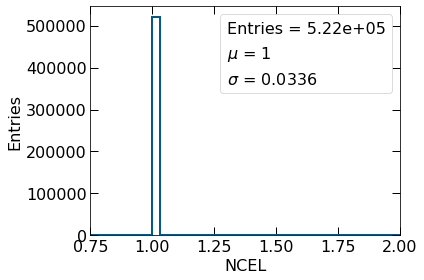

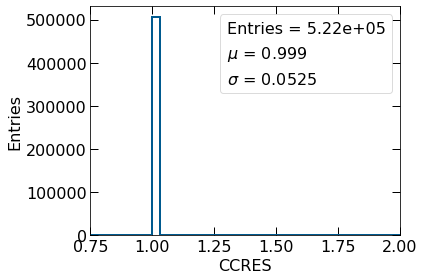

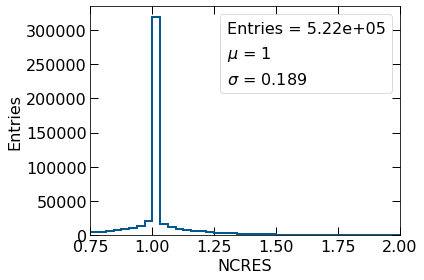

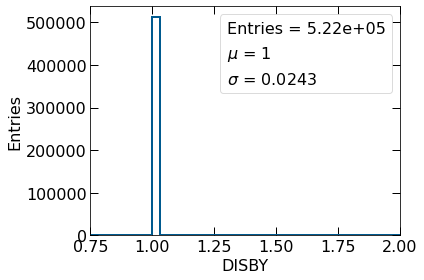

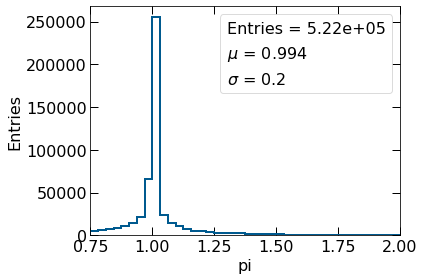

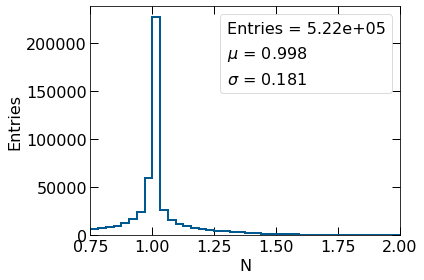

In [114]:
for name in multisim_list:
    
    df_xsecw = pd.DataFrame(df_nu[name].tolist(),index=df_nu.index).add_prefix(name+'_')

    #fill NAN with 1
    df_xsecw = df_xsecw.fillna(1)
    
    #for plotting
    pltdf = pd.DataFrame()

    for idx in len_univ:

        #for plotting
        pltdf = pd.concat([pltdf, df_xsecw[name+'_{}'.format(idx)]]) 
        
        #multiply all the weight
        df_nu['slc_xsec_total_{}'.format(idx)] = df_nu['slc_xsec_total_{}'.format(idx)] * df_xsecw[name+'_{}'.format(idx)]
        
    #drop them
    df_nu = df_nu.loc[:,~df_nu.columns.str.startswith(name+'_')]    

    #plot them please
    pltdf = pltdf.to_numpy()
    pltdf = pltdf.flatten()
    
    #pltdf[np.isnan(pltdf)] = 1    

    fig, ax1 = plt.subplots(1, figsize = (6,4))
    
    plot_1dhist( pltdf, 
                ax1,
                0.75, 2, 40,
                0.75, 2,
                ifnorm =False,
                histtype = 'step',
                linecolor = col_dict['Teal'], linewidth = 2,
                xtitle = name.split("_")[-1],
                ytitle = "Entries",  
                ifstatbox = True, loc = 'best'
                )
    
    fig.tight_layout()
    
    if ifSave:
        plt.savefig(savePath+name+".png", dpi=200)
        
    plt.show()


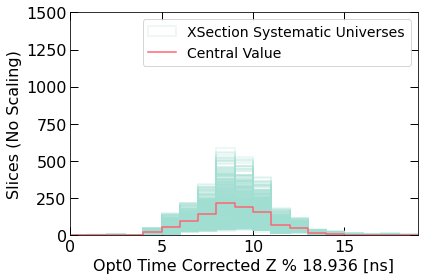

In [115]:
nu_xsec_universe = []

fig, ax = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#-----------------------------------------------------------------#
#Universe
pltdf = df_nu['mod_t']

for i in range(0, 500):
    weights = df_nu['slc_xsec_total_{}'.format(i)]
    label = ''
    
    if i == 0:
        label = "XSection Systematic Universes"
        
    nu_n, _, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["PastelGreen"],
                            alpha = 0.2,
                            linestyle = "-",
                            linewidth = 2,
                            label = label
                        )
    nu_xsec_universe.append(nu_n)
#-----------------------------------------------------------------#
#Central Value
ax.step(bins, nu_dict['nu_cv_plot']
         , color = col_dict['Flamingo']
         , label =  "Central Value"
        )
#-----------------------------------------------------------------#
ax.legend(loc = 'upper right',fontsize = 14)

plot_tick(ax, 16)
plot_title(ax, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, 1500)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_universe.png"), dpi=200)
plt.show()

In [116]:
nu_xsec_universe = np.array(nu_xsec_universe)
nu_xsec_universe = np.sort(nu_xsec_universe, axis = 0)

nu_xsec_cov, _ = get_cov_corr_matrix(nu_dict['nu_cv'], nu_xsec_universe)

(19,)
(500, 19)


In [117]:
nu_dict['cov_xsec_err'] = np.sqrt(np.diag(nu_xsec_cov))

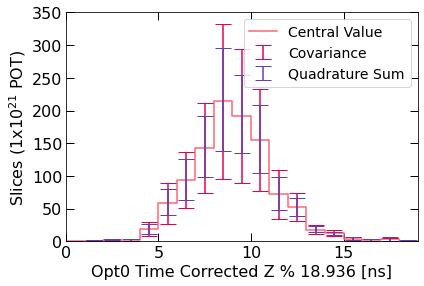

In [120]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")

#-----------------------------------------------------------------#
#covariance
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['cov_xsec_err'], nu_dict['cov_xsec_err']],
            ls='none',
            color = col_dict['Coral'],
            capsize=8
            ,label = "Covariance"
           )
#-----------------------------------------------------------------#
#universe 1 sigma
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_xsec_quadSum'], nu_dict['pos_xsec_quadSum']],
            ls='none',
            color = col_dict['Mauve'],
            capsize=8
            ,label = "Quadrature Sum"
           )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (1x10$^{21}$ POT)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, 350)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_xsec_weight_combined.png"), dpi=200)
plt.show()

<h1>Geant4 ReInteractions Weights</h1>

In [ ]:
def make_g4_weight(df):    
    #explode array into columns
    df_g4w = pd.DataFrame(df['slc_geant4_multisim_reinteractions'].tolist(),index=df.index).add_prefix('g4w_')
    
    #drop column
    df = df.drop(columns='slc_geant4_multisim_reinteractions')

    #merge 2 arrays together
    df = pd.concat([df, df_g4w], axis = 1)
    
    #add nominal flux weight = 1
    df['g4_nom'] = 1
    
    return df

In [ ]:
df_nu = make_g4_weight(df_nu)

df_nu = df_nu.fillna(1)

In [ ]:
nu_g4_multisim_universe = []

fig, ax = plt.subplots(1,1, figsize = (6,4))

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#-----------------------------------------------------------------#
pltdf = df_nu['mod_t']

for i in range(0, 1000):
    weights = df_nu['g4w_{}'.format(i)]
    label = ''
    if i == 0:
        label = "Geant4 Systematic Universes"
        
    nu_n, _, _ = ax.hist(
                            pltdf,
                            bins = np.arange(xmin, xmax+(xmax-xmin)/xnbin, (xmax-xmin)/xnbin),
                            weights = weights,
                            density = False,
                            histtype="step",
                            edgecolor = col_dict["PastelGreen"],
                            linestyle = "-",
                            linewidth = 2,
                            label = label
                        )
    nu_g4_multisim_universe.append(nu_n)
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
ax.legend(loc = 'upper right',fontsize = 14)

plot_tick(ax, 16)
plot_title(ax, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_g4_multisim_weight_universe.png"), dpi=200)
plt.show()

In [ ]:
nu_g4_multisim_universe = np.array(nu_g4_multisim_universe)
nu_g4_multisim_universe = np.sort(nu_g4_multisim_universe, axis = 0)

nu_g4_multisim_median, nu_g4_multisim_err = get_median_68_quantile(nu_dict['nu_cv'], nu_g4_multisim_universe)

#make array for plotting
nu_g4_multisim_median_plot = np.insert(nu_g4_multisim_median, 0, 0)

In [ ]:
nu_dict['neg_g4_err'] = nu_g4_multisim_err[0]
nu_dict['pos_g4_err'] = nu_g4_multisim_err[1]
nu_dict.keys()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#median
ax.step(bins, nu_g4_multisim_median_plot , color = col_dict['PastelGreen'], label = "Geant4 Systematic \nUniverses Median")
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#universe 1 sigma
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_g4_err'], nu_dict['pos_g4_err']]
            , ls='none'
            , color = col_dict['Mauve']
            , capsize=8
            , label = "68% Most Probable Quantile"
           )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_g4_multisim_weight_median68.png"), dpi=200)
plt.show()

<h3>Covariance Matrix</h3>

In [ ]:
nu_g4_multisim_cov, _ = get_cov_corr_matrix(nu_dict['nu_cv'], nu_g4_multisim_universe)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (20, 20))

ax = sns.heatmap(nu_g4_multisim_cov, annot=True, fmt='.2f', cmap = "Spectral")
plt.show()

In [ ]:
nu_dict['cov_g4_multisim_err'] = np.sqrt(np.diag(nu_g4_multisim_cov))

<h3>Comparison</h3>

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
#-----------------------------------------------------------------#
#median
ax.step(bins, nu_g4_multisim_median_plot , color = col_dict['PastelGreen'], label = "Geant4 Systematic \nUniverses Median")
#-----------------------------------------------------------------#
#central value
ax.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = "Central Value")
#-----------------------------------------------------------------#
#universe 1 sigma
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_g4_err'], nu_dict['pos_g4_err']]
            , ls='none'
            , color = col_dict['Mauve']
            , capsize=8
            , label = "68% Most Probable Quantile"
           )
#-----------------------------------------------------------------#
#covariance matrix
ax.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['cov_g4_multisim_err'], nu_dict['cov_g4_multisim_err']]
            , ls='none'
            , color = col_dict['Coral']
            , capsize=8
            , label = "Covariance Matrix"
           )
#-----------------------------------------------------------------#
#tick stuff
plot_title(ax,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Slices (No Scaling)", 16)
plot_tick(ax, 16)

ax.legend(loc="best", fontsize=14, fancybox=True, ncol = 1)

ax.set_xlim(xmin, xmax)
ax.set_ylim(nu_ymin, nu_ymax)
#-----------------------------------------------------------------#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_g4_multisim_weight_median68.png"), dpi=200)
plt.show()

<h1>Plot Everything</h1>

<h2>HNL - Directly Sum 1 Sigma </h2>

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))#, sharex = True, sharey = True)

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#=========================================================================#
#STATS
ax1.step(bins, hnl_dict['hnl_cv_plot'], color = col_dict['Flamingo']
         , label =  "HNL Central Value \nM = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(simU))
        )

ax1.errorbar(bins_mid, hnl_dict['hnl_cv']
            , [hnl_dict['neg_stat_err'],hnl_dict['pos_stat_err']]
            , ls='none'
            , color = col_dict['Lavender']
            , capsize=8
            , label = "Statistics"
           )
#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(hnl_ymin, hnl_ymax)

#=========================================================================#
#FLUX
#-----------------------------------------------------------------#
#central value
ax2.step(bins, hnl_dict['hnl_cv_plot'], color = col_dict['Flamingo']
         , label =  "HNL Central Value \nM = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(simU)))
#-----------------------------------------------------------------#
#universe 1 sigma
ax2.errorbar(bins_mid, hnl_dict['hnl_cv']
            , [hnl_dict['neg_flx_err'],hnl_dict['pos_flx_err']]
            , ls='none'
            , color = col_dict['PastelGreen']
            , capsize=8
            ,label = "Flux"
           )

#-----------------------------------------------------------------#
ax2.legend(loc = 'upper left',fontsize = 14)
plot_tick(ax2, 16)
plot_title(ax2, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(hnl_ymin, hnl_ymax)

#=========================================================================#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("hnl_beam_bucket_standard_error.png"), dpi=200)
    
plt.show()

In [ ]:
hnl_dict['neg_stat_err'] = hnl_dict['neg_stat_err'].reshape(1,19)
hnl_dict['neg_flx_err'] = hnl_dict['neg_flx_err'].reshape(1,19)

hnl_neg_err = np.append(hnl_dict['neg_stat_err']
                        , hnl_dict['neg_flx_err']
                        , axis=0)

hnl_neg_quad_err = np.apply_along_axis(quadratureSumArray, axis=0, arr=hnl_neg_err)

hnl_dict['neg_quadSum_err'] = hnl_neg_quad_err
#------------------------------------------------------------------#

hnl_dict['pos_flx_err'] = hnl_dict['pos_flx_err'].reshape(1,19)
hnl_dict['pos_stat_err'] = hnl_dict['pos_stat_err'].reshape(1,19)

hnl_pos_err = np.append(hnl_dict['pos_stat_err']
                        , hnl_dict['pos_flx_err']
                        , axis=0)

hnl_pos_quad_err = np.apply_along_axis(quadratureSumArray, axis=0, arr=hnl_pos_err)

hnl_dict['pos_quadSum_err'] = hnl_pos_quad_err
#------------------------------------------------------------------#
print("\n Negative Direction")
print(hnl_neg_err)
print(hnl_neg_quad_err)

#------------------------------------------------------------------#
print("\n Positive Direction")
print(hnl_pos_err)
print(hnl_pos_quad_err)

In [ ]:
#FOR PLOTTING

#Stat
hnl_stat_neg_diff = hnl_dict['neg_stat_err'] / hnl_dict['hnl_cv']
hnl_stat_neg_diff = np.insert(hnl_stat_neg_diff, 0, 0)

hnl_stat_pos_diff = hnl_dict['pos_stat_err'] / hnl_dict['hnl_cv']
hnl_stat_pos_diff = np.insert(hnl_stat_pos_diff, 0, 0)

#Flux
hnl_flx_neg_diff = hnl_dict['neg_flx_err'] / hnl_dict['hnl_cv']
hnl_flx_neg_diff = np.insert(hnl_flx_neg_diff, 0, 0)

hnl_flx_pos_diff = hnl_dict['pos_flx_err'] / hnl_dict['hnl_cv']
hnl_flx_pos_diff = np.insert(hnl_flx_pos_diff, 0, 0)

#Quad Sum
hnl_quadsum_neg_diff = hnl_dict['neg_quadSum_err'] / hnl_dict['hnl_cv']
hnl_quadsum_neg_diff = np.insert(hnl_quadsum_neg_diff, 0, 0)

hnl_quadsum_pos_diff = hnl_dict['pos_quadSum_err'] / hnl_dict['hnl_cv']
hnl_quadsum_pos_diff = np.insert(hnl_quadsum_pos_diff, 0, 0)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (6, 6), sharex = True)

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#=========================================================================#

ax1.step(bins, hnl_dict['hnl_cv_plot'], color = col_dict['Flamingo']
         , label =  "HNL Central Value \nM = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(simU))
        )
#-----------------------------------------------------------------#
#QuadSum
ax1.errorbar(bins_mid, hnl_dict['hnl_cv']
            , [hnl_dict['neg_quadSum_err'], hnl_dict['pos_quadSum_err']]
            , ls='none'
            , color = col_dict['DeepViolet']
            , capsize=8
            ,label = "Quadrature Sum"
           )
#-----------------------------------------------------------------#
#STATS
ax1.errorbar(bins_mid, hnl_dict['hnl_cv']
            , [hnl_dict['neg_stat_err'].flatten(), hnl_dict['pos_stat_err'].flatten()]
            , ls='none'
            , color = col_dict['Lavender']
            , capsize=8
            ,label = "Statistics"
           )
#-----------------------------------------------------------------#
#Flux
ax1.errorbar(bins_mid, hnl_dict['hnl_cv']
            , [hnl_dict['neg_flx_err'].flatten(), hnl_dict['pos_flx_err'].flatten()]
            , ls='none'
            , color = col_dict['PastelGreen']
            , capsize=8
            ,label = "Flux"
           )
#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", '',  "Slices (No Scaling)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(hnl_ymin, hnl_ymax)
#=========================================================================#
#-----------------------------------------------------------------#
#QuadSum
ax2.step(bins, hnl_quadsum_neg_diff  * -1
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )

ax2.step(bins, hnl_quadsum_pos_diff
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )
#-----------------------------------------------------------------#
#STATS
ax2.step(bins, hnl_stat_neg_diff  * -1
         , color = col_dict['Lavender']
        )

ax2.step(bins, hnl_stat_pos_diff
         , color = col_dict['Lavender']
        )
#-----------------------------------------------------------------#
#Flux
ax2.step(bins, hnl_flx_neg_diff  * -1
         , color = col_dict['PastelGreen']
        )

ax2.step(bins, hnl_flx_pos_diff
         , color = col_dict['PastelGreen']
        )

#-----------------------------------------------------------------#

#ax2.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax2, 16)
plot_title(ax2,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Fractional Error", 16)


ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-0.2, 0.2)
#=========================================================================#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("hnl_beam_bucket_combined_standard_error.png"), dpi=200)
    
plt.show()

<h3>Scale To POT AND Umu Coupling</h3>

In [ ]:
scale_factor = df_hnl['scale_pot'].unique()[0]
fitU = plotU
print(scale_factor)
print(fitU)


scale = 1/80
scale_factor = scale_factor * scale
fitU = getUfromScaleFactor(fitU, scale)
print(scale_factor)
print(fitU)


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (6, 6), sharex = True)

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#=========================================================================#

ax1.step(bins, hnl_dict['hnl_cv_plot']* scale_factor
         , color = col_dict['Flamingo']
         , label =  "HNL Central Value \nM = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(fitU))
        )
#-----------------------------------------------------------------#
#QuadSum
ax1.errorbar(bins_mid, hnl_dict['hnl_cv'] * scale_factor
            , [hnl_quadsum_neg_diff[1:] * hnl_dict['hnl_cv'] * scale_factor
               , hnl_quadsum_pos_diff[1:] * hnl_dict['hnl_cv'] * scale_factor]
            , ls='none'
            , color = col_dict['DeepViolet']
            , capsize=8
            ,label = "Quadrature Sum"
           )
#-----------------------------------------------------------------#
#STATS
ax1.errorbar(bins_mid, hnl_dict['hnl_cv'] * scale_factor
            , [hnl_stat_neg_diff[1:] * hnl_dict['hnl_cv'] * scale_factor
               , hnl_stat_pos_diff[1:] * hnl_dict['hnl_cv'] * scale_factor]
            , ls='none'
            , color = col_dict['Lavender']
            , capsize=8
            ,label = "Statistics"
           )
#-----------------------------------------------------------------#
#Flux
ax1.errorbar(bins_mid, hnl_dict['hnl_cv'] * scale_factor
            , [hnl_flx_neg_diff[1:] * hnl_dict['hnl_cv'] * scale_factor
               , hnl_flx_pos_diff[1:] * hnl_dict['hnl_cv'] * scale_factor]
            , ls='none'
            , color = col_dict['PastelGreen']
            , capsize=8
            ,label = "Flux"
           )
#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", '',  r"Slices (1$\times10^{21}$ POT)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(hnl_ymin, hnl_ymax * scale_factor)
#=========================================================================#
#-----------------------------------------------------------------#
#QuadSum
ax2.step(bins, hnl_quadsum_neg_diff * -1
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )

ax2.step(bins, hnl_quadsum_pos_diff
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )
#-----------------------------------------------------------------#
#STATS
ax2.step(bins, hnl_stat_neg_diff   * -1
         , color = col_dict['Lavender']
        )

ax2.step(bins, hnl_stat_pos_diff
         , color = col_dict['Lavender']
        )
#-----------------------------------------------------------------#
#Flux
ax2.step(bins, hnl_flx_neg_diff * -1
         , color = col_dict['PastelGreen']
        )

ax2.step(bins, hnl_flx_pos_diff
         , color = col_dict['PastelGreen']
        )

#-----------------------------------------------------------------#

#ax2.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax2, 16)
plot_title(ax2,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Fractional Error", 16)


ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-0.2, 0.2)
#=========================================================================#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("hnl_beam_bucket_combined_standard_error_scaleToPOT.png"), dpi=200)
    
plt.show()

In [ ]:
hnl_dict['hnl_cv_scale'] = hnl_dict['hnl_cv'] * scale_factor

#stat
hnl_dict['neg_stat_err_scale'] = hnl_stat_neg_diff[1:] * hnl_dict['hnl_cv'] * scale_factor
hnl_dict['pos_stat_err_scale'] = hnl_stat_pos_diff[1:] * hnl_dict['hnl_cv'] * scale_factor

#flux
hnl_dict['neg_flx_err_scale'] = hnl_flx_neg_diff[1:] * hnl_dict['hnl_cv'] * scale_factor
hnl_dict['pos_flx_err_scale'] = hnl_flx_pos_diff[1:] * hnl_dict['hnl_cv'] * scale_factor

#quadSum
hnl_dict['neg_quadSum_err_scale'] = hnl_quadsum_neg_diff[1:] * hnl_dict['hnl_cv'] * scale_factor
hnl_dict['pos_quadSum_err_scale'] = hnl_quadsum_pos_diff[1:] * hnl_dict['hnl_cv'] * scale_factor

<h2>HNL - Covariance Matrix Way </h2>

In [ ]:
hnl_cv = hnl_dict['hnl_cv']

#stat
hnl_stat_cov = np.diag(hnl_cv) #[some NxN covariance matrix e.g. np.diag(cv) for statistical]
hnl_stat_err = np.sqrt(np.diag(hnl_stat_cov))


hnl_stat_frac = hnl_stat_cov / np.outer(hnl_cv, hnl_cv) # N / (N * N)
hnl_stat_frac_err = np.sqrt(np.diag(hnl_stat_frac)) # sqrt(N)


#flux
hnl_flx_cov, _ = get_cov_corr_matrix(hnl_cv, hnl_flx_universe)
hnl_flx_err = np.sqrt(np.diag(hnl_flx_cov))

hnl_flx_frac = hnl_flx_cov / np.outer(hnl_cv, hnl_cv)
hnl_flx_frac_err = np.sqrt(np.diag(hnl_flx_frac)) # sqrt(N)

#add covariance matrix
hnl_combined_cov = hnl_stat_cov + hnl_flx_cov
hnl_combined_err = np.sqrt(np.diag(hnl_combined_cov))

hnl_combined_frac = hnl_combined_cov / np.outer(hnl_cv, hnl_cv) # N / (N * N)
hnl_combined_frac_err = np.sqrt(np.diag(hnl_combined_frac)) # sqrt(N)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (6, 6), sharex = True)

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#=========================================================================#

ax1.step(bins, hnl_dict['hnl_cv_plot']
         , color = col_dict['Flamingo']
         , label =  "HNL Central Value \nM = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(simU))
        )
#-----------------------------------------------------------------#
#Quad Sum
ax1.errorbar(bins_mid, hnl_dict['hnl_cv']
            , hnl_combined_err
            , ls='none'
            , color = col_dict['DeepViolet']
            , capsize=8
            ,label = "Quadrature Sum"
           )
#-----------------------------------------------------------------#
#STATS
ax1.errorbar(bins_mid, hnl_dict['hnl_cv']
            , hnl_stat_err
            , ls='none'
            , color = col_dict['Lavender']
            , capsize=8
            ,label = "Statistics"
           )
#-----------------------------------------------------------------#
#FLUX
ax1.errorbar(bins_mid, hnl_dict['hnl_cv']
            , hnl_flx_err
            , ls='none'
            , color = col_dict['PastelGreen']
            , capsize=8
            ,label = "Flux"
           )


#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", '',  r"Slices (No Scaling)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(hnl_ymin, hnl_ymax)
#=========================================================================#
#-----------------------------------------------------------------#
#QUAD SUM
ax2.step(bins, np.insert(hnl_combined_frac_err, 0,0) * -1
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )

ax2.step(bins, np.insert(hnl_combined_frac_err, 0,0) 
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )
#-----------------------------------------------------------------#
#STATS
ax2.step(bins, np.insert(hnl_stat_frac_err, 0,0) * -1
         , color = col_dict['Lavender']
        )

ax2.step(bins, np.insert(hnl_stat_frac_err, 0,0) 
         , color = col_dict['Lavender']
        )
#-----------------------------------------------------------------#
#FLUX
ax2.step(bins, np.insert(hnl_flx_frac_err, 0,0) * -1
         , color = col_dict['PastelGreen']
        )

ax2.step(bins, np.insert(hnl_flx_frac_err, 0,0) 
         , color = col_dict['PastelGreen']
        )
#-----------------------------------------------------------------#

#ax2.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax2, 16)
plot_title(ax2,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Fractional Error", 16)


ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-0.2, 0.2)
#=========================================================================#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("hnl_beam_bucket_combined_covariance.png"), dpi=200)
    
plt.show()

<h3>Scale To POT AND Umu Coupling</h3>

In [ ]:
hnl_cv_scale = hnl_cv * scale_factor

#stat
hnl_stat_cov_scale = np.outer(hnl_cv_scale, hnl_cv_scale) * hnl_stat_frac
hnl_stat_err_scale = np.sqrt(np.diag(hnl_stat_cov_scale))

hnl_stat_frac_scale = hnl_stat_cov_scale / np.outer(hnl_cv_scale, hnl_cv_scale) # N / (N * N)
hnl_stat_frac_err_scale = np.sqrt(np.diag(hnl_stat_frac_scale)) # sqrt(N)


#flux
hnl_flx_cov_scale = np.outer(hnl_cv_scale, hnl_cv_scale) * hnl_flx_frac
hnl_flx_err_scale = np.sqrt(np.diag(hnl_flx_cov_scale))

hnl_flx_frac_scale = hnl_flx_cov_scale / np.outer(hnl_cv_scale, hnl_cv_scale)
hnl_flx_frac_err_scale = np.sqrt(np.diag(hnl_flx_frac_scale)) # sqrt(N)


#add covariance matrix
hnl_combined_cov_scale = np.outer(hnl_cv_scale, hnl_cv_scale) * hnl_combined_frac
hnl_combined_err_scale = np.sqrt(np.diag(hnl_combined_cov_scale))

hnl_combined_frac_scale = hnl_combined_cov_scale / np.outer(hnl_cv_scale, hnl_cv_scale) # N / (N * N)
hnl_combined_frac_err_scale = np.sqrt(np.diag(hnl_combined_frac_scale)) # sqrt(N)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (6, 6), sharex = True)

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#=========================================================================#

ax1.step(bins, hnl_dict['hnl_cv_plot'] * scale_factor
         , color = col_dict['Flamingo']
         , label =  "HNL Central Value \nM = 200 MeV\n|U$_{\mu4}|^{2} = $" +str("{:.3g}".format(fitU))
        )
#-----------------------------------------------------------------#
#Quad Sum
ax1.errorbar(bins_mid, hnl_dict['hnl_cv'] * scale_factor
            , hnl_combined_err_scale
            , ls='none'
            , color = col_dict['DeepViolet']
            , capsize=8
            ,label = "Quadrature Sum"
           )
#-----------------------------------------------------------------#
#STATS
ax1.errorbar(bins_mid, hnl_dict['hnl_cv'] * scale_factor
            , hnl_stat_err_scale
            , ls='none'
            , color = col_dict['Lavender']
            , capsize=8
            ,label = "Statistics"
           )
#-----------------------------------------------------------------#
#FLUX
ax1.errorbar(bins_mid, hnl_dict['hnl_cv'] * scale_factor
            , hnl_flx_err_scale
            , ls='none'
            , color = col_dict['PastelGreen']
            , capsize=8
            ,label = "Flux"
           )


#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", '',  r"Slices (1$\times10^{21}$ POT)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(hnl_ymin, hnl_ymax * scale_factor)
#=========================================================================#
#-----------------------------------------------------------------#
#QUAD SUM
ax2.step(bins, np.insert(hnl_combined_frac_err_scale, 0,0) * -1
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )

ax2.step(bins, np.insert(hnl_combined_frac_err_scale, 0,0) 
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )
#-----------------------------------------------------------------#
#STATS
ax2.step(bins, np.insert(hnl_stat_frac_err_scale, 0,0) * -1
         , color = col_dict['Lavender']
        )

ax2.step(bins, np.insert(hnl_stat_frac_err_scale, 0,0) 
         , color = col_dict['Lavender']
        )
#-----------------------------------------------------------------#
#FLUX
ax2.step(bins, np.insert(hnl_flx_frac_err_scale, 0,0) * -1
         , color = col_dict['PastelGreen']
        )

ax2.step(bins, np.insert(hnl_flx_frac_err_scale, 0,0) 
         , color = col_dict['PastelGreen']
        )
#-----------------------------------------------------------------#

#ax2.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax2, 16)
plot_title(ax2,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Fractional Error", 16)


ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-0.2, 0.2)
#=========================================================================#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("hnl_beam_bucket_combined_covariance_scaleToPOT.png"), dpi=200)
    
plt.show()

<h2>Neutrino - Directly Sum 1 Sigma </h2>

In [ ]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize = (12,8))#, sharey = True, sharex= True)

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax
#=========================================================================#
#STATS
#-----------------------------------------------------------------#
#central value
ax1.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = r" $\nu$ Central Value")

ax1.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_stat_err'],nu_dict['pos_stat_err']]
            , ls='none'
            , color = col_dict['Lavender']
            , capsize=8
            , label = "Statistics"
           )
#-----------------------------------------------------------------#
ax1.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(nu_ymin, nu_ymax)

#=========================================================================#
#FLUX
#-----------------------------------------------------------------#
#central value
ax2.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = r" $\nu$ Central Value")

#-----------------------------------------------------------------#
#universe 1 sigma
ax2.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_flx_err'],nu_dict['pos_flx_err']]
            , ls='none'
            , color = col_dict['PastelGreen']
            , capsize=8
            , label = "Flux"
           )

#-----------------------------------------------------------------#
ax2.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax2, 16)
plot_title(ax2, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax2.set_xlim(xmin, xmax)
ax2.set_ylim(nu_ymin, nu_ymax)

#=========================================================================#
#XSEC
#-----------------------------------------------------------------#
#central value
ax3.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = r" $\nu$ Central Value")

#-----------------------------------------------------------------#
#universe 1 sigma
ax3.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_xsec_quadSum'],nu_dict['pos_xsec_quadSum']]
            , ls='none'
            , color = col_dict['Peach']
            , capsize=8
            , label = r" $\nu$ XSec"
           )

#-----------------------------------------------------------------#
ax3.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax3, 16)
plot_title(ax3, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax3.set_xlim(xmin, xmax)
ax3.set_ylim(nu_ymin, nu_ymax)
#=========================================================================#
#G4
#-----------------------------------------------------------------#
#central value
ax4.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = r" $\nu$ Central Value")

#-----------------------------------------------------------------#
#universe 1 sigma
ax4.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_g4_err'],nu_dict['pos_g4_err']]
            , ls='none'
            , color = col_dict['SkyBlue']
            , capsize=8
            , label = "Geant4 Re-Interactions"
           )

#-----------------------------------------------------------------#
ax4.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax4, 16)
plot_title(ax4, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax4.set_xlim(xmin, xmax)
ax4.set_ylim(nu_ymin, nu_ymax)
#=========================================================================#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_standard_error.png"), dpi=200)
    
plt.show()

In [ ]:
nu_dict['neg_stat_err'] = nu_dict['neg_stat_err'].reshape(1,19)
nu_dict['neg_flx_err'] = nu_dict['neg_flx_err'].reshape(1,19)
nu_dict['neg_xsec_quadSum'] = nu_dict['neg_xsec_quadSum'].reshape(1,19)
nu_dict['neg_g4_err'] = nu_dict['neg_g4_err'].reshape(1,19)

nu_neg_err = np.append(nu_dict['neg_stat_err'], nu_dict['neg_flx_err'], axis=0)
nu_neg_err = np.append(nu_neg_err, nu_dict['neg_xsec_quadSum'], axis=0)
nu_neg_err = np.append(nu_neg_err, nu_dict['neg_g4_err'], axis=0)

print("\n Negative Direction")
print(nu_neg_err)

#------------------------------------------------------------------#

nu_dict['pos_stat_err'] = nu_dict['pos_stat_err'].reshape(1,19)
nu_dict['pos_flx_err'] = nu_dict['pos_flx_err'].reshape(1,19)
nu_dict['pos_xsec_quadSum'] = nu_dict['pos_xsec_quadSum'].reshape(1,19)
nu_dict['pos_g4_err'] = nu_dict['pos_g4_err'].reshape(1,19)

nu_pos_err = np.append(nu_dict['pos_stat_err'], nu_dict['pos_flx_err'], axis=0)
nu_pos_err = np.append(nu_pos_err, nu_dict['pos_xsec_quadSum'], axis=0)
nu_pos_err = np.append(nu_pos_err, nu_dict['pos_g4_err'], axis=0)

print("\n Positive Direction")
print(nu_pos_err)

#------------------------------------------------------------------#

nu_neg_quad_err = np.apply_along_axis(quadratureSumArray, axis=0, arr=nu_neg_err)

nu_dict['neg_quadSum_err'] = nu_neg_quad_err
#------------------------------------------------------------------#

nu_pos_quad_err = np.apply_along_axis(quadratureSumArray, axis=0, arr=nu_pos_err)

nu_dict['pos_quadSum_err'] = nu_pos_quad_err

In [ ]:
nu_dict.keys()
print(nu_dict['neg_quadSum_err'])
print(nu_dict['pos_quadSum_err'])

In [ ]:
#FOR PLOTTING

#Stat
nu_stat_neg_diff = nu_dict['neg_stat_err'] / nu_dict['nu_cv']
nu_stat_neg_diff = np.insert(nu_stat_neg_diff, 0, 0)
nu_stat_neg_diff[np.isnan(nu_stat_neg_diff)] = 0

nu_stat_pos_diff = nu_dict['pos_stat_err'] / nu_dict['nu_cv']
nu_stat_pos_diff = np.insert(nu_stat_pos_diff, 0, 0)
nu_stat_pos_diff[np.isnan(nu_stat_pos_diff)] = 0

#Flux
nu_flx_neg_diff = nu_dict['neg_flx_err'] / nu_dict['nu_cv']
nu_flx_neg_diff = np.insert(nu_flx_neg_diff, 0, 0)
nu_flx_neg_diff[np.isnan(nu_flx_neg_diff)] = 0

nu_flx_pos_diff = nu_dict['pos_flx_err'] / nu_dict['nu_cv']
nu_flx_pos_diff = np.insert(nu_flx_pos_diff, 0, 0)
nu_flx_pos_diff[np.isnan(nu_flx_pos_diff)] = 0

#Quad Sum
nu_quadsum_neg_diff = nu_dict['neg_quadSum_err'] / nu_dict['nu_cv']
nu_quadsum_neg_diff = np.insert(nu_quadsum_neg_diff, 0, 0)
nu_quadsum_neg_diff[np.isnan(nu_quadsum_neg_diff)] = 0

nu_quadsum_pos_diff = nu_dict['pos_quadSum_err'] / nu_dict['nu_cv']
nu_quadsum_pos_diff = np.insert(nu_quadsum_pos_diff, 0, 0)
nu_quadsum_pos_diff[np.isnan(nu_quadsum_pos_diff)] = 0

#XSec
nu_xsec_neg_diff = nu_dict['neg_xsec_quadSum'] / nu_dict['nu_cv']
nu_xsec_neg_diff = np.insert(nu_xsec_neg_diff, 0, 0)
nu_xsec_neg_diff[np.isnan(nu_xsec_neg_diff)] = 0

nu_xsec_pos_diff = nu_dict['pos_xsec_quadSum'] / nu_dict['nu_cv']
nu_xsec_pos_diff = np.insert(nu_xsec_pos_diff, 0, 0)
nu_xsec_pos_diff[np.isnan(nu_xsec_pos_diff)] = 0

#G4
nu_g4_neg_diff = nu_dict['neg_g4_err'] / nu_dict['nu_cv']
nu_g4_neg_diff = np.insert(nu_g4_neg_diff, 0, 0)
nu_g4_neg_diff[np.isnan(nu_g4_neg_diff)] = 0

nu_g4_pos_diff = nu_dict['pos_g4_err'] / nu_dict['nu_cv']
nu_g4_pos_diff = np.insert(nu_g4_pos_diff, 0, 0)
nu_g4_pos_diff[np.isnan(nu_g4_pos_diff)] = 0

In [ ]:
print(nu_dict['neg_stat_err'] / nu_dict['nu_cv'])
print(nu_dict['pos_stat_err'] / nu_dict['nu_cv'])

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (6, 6), sharex = True)

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax

#-----------------------------------------------------------------#
#central value
ax1.step(bins, nu_dict['nu_cv_plot'], color = col_dict['Flamingo'], label = r" $\nu$ Central Value")
#=========================================================================#
#QuadSum
ax1.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_quadSum_err'],nu_dict['pos_quadSum_err']]
            , ls='none'
            , color = col_dict['DeepViolet']
            , capsize=8
            , label = "Quadrature Sum"
           )

#=========================================================================#
#XSEC
ax1.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_xsec_quadSum'].flatten(),nu_dict['pos_xsec_quadSum'].flatten()]
            , ls='none'
            , color = col_dict['Peach']
            , capsize=8
            , label = r" $\nu$ XSec"
           )

#=========================================================================#
#FLUX
ax1.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_flx_err'].flatten(),nu_dict['pos_flx_err'].flatten()]
            , ls='none'
            , color = col_dict['PastelGreen']
            , capsize=8
            , label = "Flux"
           )

#=========================================================================#
#STATS
ax1.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_stat_err'].flatten(),nu_dict['pos_stat_err'].flatten()]
            , ls='none'
            , color = col_dict['Lavender']
            , capsize=8
            , label = "Statistics"
           )
#=========================================================================#
#G4
ax1.errorbar(bins_mid, nu_dict['nu_cv']
            , [nu_dict['neg_g4_err'].flatten(),nu_dict['pos_g4_err'].flatten()]
            , ls='none'
            , color = col_dict['SkyBlue']
            , capsize=8
            , label = "Geant4 \nRe-Interactions"
           )
#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(nu_ymin, nu_ymax)
#=========================================================================#
#-----------------------------------------------------------------#
#QuadSum
ax2.step(bins, nu_quadsum_neg_diff * -1
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )

ax2.step(bins, nu_quadsum_pos_diff
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )
#-----------------------------------------------------------------#
#XSec
ax2.step(bins, nu_xsec_neg_diff * -1
         , color = col_dict['Peach'] 
        )

ax2.step(bins, nu_xsec_pos_diff
         , color = col_dict['Peach'] 
        )
#-----------------------------------------------------------------#
#Flux
ax2.step(bins, nu_flx_neg_diff * -1
         , color = col_dict['PastelGreen']
        )

ax2.step(bins, nu_flx_pos_diff
         , color = col_dict['PastelGreen']
        )
#-----------------------------------------------------------------#
#STATS
ax2.step(bins, nu_stat_neg_diff * -1
         , color = col_dict['Lavender']
        )

ax2.step(bins, nu_stat_pos_diff
         , color = col_dict['Lavender']
        )

#-----------------------------------------------------------------#
#G4
ax2.step(bins, nu_g4_neg_diff * -1
         , color = col_dict['SkyBlue']
        )

ax2.step(bins, nu_g4_pos_diff
         , color = col_dict['SkyBlue']
        )
#-----------------------------------------------------------------#

#ax2.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax2, 16)
plot_title(ax2,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Fractional Error", 16)


ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-2, 2)
ax2.axhline(y=1)
ax2.axhline(y=-1)
#=========================================================================#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_combined_standard_error.png"), dpi=200)
    
plt.show()

<h3>Scale To POT ONLY</h3>

In [ ]:
scale_factor_nu = df_nu['scale_pot'].unique()[0]
print(scale_factor_nu)

In [ ]:
hnl_quadsum_neg_diff[1:] * hnl_dict['hnl_cv'] * scale_factor

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (6, 6), sharex = True)

xmin, xmax, xnbin = xmin, xmax, xnbin
xlimmin, xlimmax = xmin, xmax

#-----------------------------------------------------------------#
#central value
ax1.step(bins, nu_dict['nu_cv_plot'] * scale_factor_nu
         , color = col_dict['Flamingo'], label = r" $\nu$ Central Value")
#=========================================================================#
#QuadSum
ax1.errorbar(bins_mid, nu_dict['nu_cv'] * scale_factor_nu
            , [nu_quadsum_neg_diff[1:] * scale_factor_nu * nu_dict['nu_cv']
               , nu_quadsum_pos_diff[1:]  * scale_factor_nu * nu_dict['nu_cv']]
            , ls='none'
            , color = col_dict['DeepViolet']
            , capsize=8
            , label = "Quadrature Sum"
           )

#=========================================================================#
#STATS
ax1.errorbar(bins_mid, nu_dict['nu_cv']  * scale_factor_nu
            , [nu_stat_neg_diff[1:] * scale_factor_nu * nu_dict['nu_cv']
               ,nu_stat_pos_diff[1:] * scale_factor_nu * nu_dict['nu_cv']]
            , ls='none'
            , color = col_dict['Lavender']
            , capsize=8
            , label = "Statistics"
           )
#=========================================================================#
#XSEC
ax1.errorbar(bins_mid, nu_dict['nu_cv']  * scale_factor_nu
            , [nu_xsec_neg_diff[1:] * scale_factor_nu * nu_dict['nu_cv']
               ,nu_xsec_pos_diff[1:] * scale_factor_nu * nu_dict['nu_cv']]
            , ls='none'
            , color = col_dict['Peach']
            , capsize=8
            , label = r" $\nu$ XSec"
           )

#=========================================================================#
#FLUX
ax1.errorbar(bins_mid, nu_dict['nu_cv']  * scale_factor_nu
            , [nu_flx_neg_diff[1:] * scale_factor_nu * nu_dict['nu_cv']
               ,nu_flx_pos_diff[1:] * scale_factor_nu * nu_dict['nu_cv']]
            , ls='none'
            , color = col_dict['PastelGreen']
            , capsize=8
            , label = "Flux"
           )

#=========================================================================#
#G4
ax1.errorbar(bins_mid, nu_dict['nu_cv']  * scale_factor_nu
            , [nu_g4_neg_diff[1:] * scale_factor_nu * nu_dict['nu_cv']
               ,nu_g4_pos_diff[1:] * scale_factor_nu * nu_dict['nu_cv']]
            , ls='none'
            , color = col_dict['SkyBlue']
            , capsize=8
            , label = "Geant4 \nRe-Interactions"
           )
#-----------------------------------------------------------------#
ax1.legend(loc = 'upper left',fontsize = 14)
plot_tick(ax1, 16)
plot_title(ax1, "", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]',  "Slices (No Scaling)", 16)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(nu_ymin, nu_ymax * scale_factor_nu)
#=========================================================================#
#-----------------------------------------------------------------#
#QuadSum
ax2.step(bins, nu_quadsum_neg_diff * -1
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )

ax2.step(bins, nu_quadsum_pos_diff
         , color = col_dict['DeepViolet'] , linestyle = '--'
        )
#-----------------------------------------------------------------#
#STATS
ax2.step(bins, nu_stat_neg_diff * -1
         , color = col_dict['Lavender']
        )

ax2.step(bins, nu_stat_pos_diff
         , color = col_dict['Lavender']
        )

#-----------------------------------------------------------------#
#XSec
ax2.step(bins, nu_xsec_neg_diff * -1
         , color = col_dict['Peach'] 
        )

ax2.step(bins, nu_xsec_pos_diff
         , color = col_dict['Peach'] 
        )
#-----------------------------------------------------------------#
#Flux
ax2.step(bins, nu_flx_neg_diff * -1
         , color = col_dict['PastelGreen']
        )

ax2.step(bins, nu_flx_pos_diff
         , color = col_dict['PastelGreen']
        )

#-----------------------------------------------------------------#
#G4
ax2.step(bins, nu_g4_neg_diff * -1
         , color = col_dict['SkyBlue']
        )

ax2.step(bins, nu_g4_pos_diff
         , color = col_dict['SkyBlue']
        )
#-----------------------------------------------------------------#

#ax2.legend(loc = 'upper right',fontsize = 14)
plot_tick(ax2, 16)
plot_title(ax2,"", 'Opt0 Time Corrected Z % ' + str(width) + ' [ns]', "Fractional Error", 16)


ax2.set_xlim(xmin, xmax)
ax2.set_ylim(-2, 2)
ax2.axhline(y=1)
ax2.axhline(y=-1)
#=========================================================================#
fig.tight_layout()

if ifSave:
    plt.savefig(savePath+str("nu_beam_bucket_combined_standard_error_scalePOT.png"), dpi=200)
    
plt.show()

In [ ]:
nu_dict['nu_cv_scale'] = nu_dict['nu_cv'] * scale_factor_nu

#quadSum
nu_dict['neg_quadSum_err_scale'] = nu_quadsum_neg_diff[1:] * scale_factor_nu * nu_dict['nu_cv']
nu_dict['pos_quadSum_err_scale'] = nu_quadsum_pos_diff[1:] * scale_factor_nu * nu_dict['nu_cv']

#stat
nu_dict['neg_stat_err_scale'] = nu_stat_neg_diff[1:] * scale_factor_nu * nu_dict['nu_cv']
nu_dict['pos_stat_err_scale'] = nu_stat_pos_diff[1:] * scale_factor_nu * nu_dict['nu_cv']

#stat
nu_dict['neg_stat_err_scale'] = nu_stat_neg_diff[1:] * scale_factor_nu * nu_dict['nu_cv']
nu_dict['pos_stat_err_scale'] = nu_stat_pos_diff[1:] * scale_factor_nu * nu_dict['nu_cv']

#flux
nu_dict['neg_flx_err_scale'] = nu_flx_neg_diff[1:] * scale_factor_nu * nu_dict['nu_cv']
nu_dict['pos_flx_err_scale'] = nu_flx_pos_diff[1:] * scale_factor_nu * nu_dict['nu_cv']

#g4
nu_dict['neg_g4_err_scale'] = nu_g4_neg_diff[1:] * scale_factor_nu * nu_dict['nu_cv']
nu_dict['pos_g4_err_scale'] = nu_g4_pos_diff[1:] * scale_factor_nu * nu_dict['nu_cv']

#xsec
nu_dict['neg_xsec_err_scale'] = nu_xsec_neg_diff[1:] * scale_factor_nu * nu_dict['nu_cv']
nu_dict['pos_xsec_err_scale'] = nu_xsec_pos_diff[1:] * scale_factor_nu * nu_dict['nu_cv']

<h1> Quadrature Sum 2 Directional Error Bars Into 1 </h1>

<h3>HNL</h3>

In [ ]:
hnl_dict

In [ ]:
hnl_negpos_stat_arr = (hnl_dict['neg_stat_err_scale'], hnl_dict['pos_stat_err_scale'])
hnl_negpos_stat_arr = np.array(hnl_negpos_stat_arr)

hnl_dict['negpos_stat_err_scale'] = np.apply_along_axis(quadratureSumArray, axis=0, arr=hnl_negpos_stat_arr)

#------------------------------------------------------------------#
hnl_negpos_flx_arr = (hnl_dict['neg_flx_err_scale'], hnl_dict['pos_flx_err_scale'])
hnl_negpos_flx_arr = np.array(hnl_negpos_flx_arr)

hnl_dict['negpos_flx_err_scale'] = np.apply_along_axis(quadratureSumArray, axis=0, arr=hnl_negpos_flx_arr)

#------------------------------------------------------------------#
hnl_negpos_quadsum_arr = (hnl_dict['neg_quadSum_err_scale'], hnl_dict['pos_quadSum_err_scale'])
hnl_negpos_quadsum_arr = np.array(hnl_negpos_quadsum_arr)

hnl_dict['negpos_quadSum_err_scale'] = np.apply_along_axis(quadratureSumArray, axis=0, arr=hnl_negpos_quadSum_arr)

#------------------------------------------------------------------#

print('\n Stat')
print(hnl_negpos_stat_arr)
print(hnl_dict['negpos_stat_err_scale'])

print('\n Flux')
print(hnl_negpos_flx_arr)
print(hnl_dict['negpos_flx_err_scale'])

print('\n QuadSum')
print(hnl_negpos_quadSum_arr)
print(hnl_dict['negpos_quadSum_err_scale'])

<h3>Neutrino</h3>

In [ ]:
nu_dict.keys()

In [ ]:
nu_negpos_stat_arr = [nu_dict['neg_stat_err_scale'], nu_dict['pos_stat_err_scale']]
nu_negpos_stat_arr = np.array(nu_negpos_stat_arr)

nu_dict['negpos_stat_err_scale'] = np.apply_along_axis(quadratureSumArray, axis=0, arr=nu_negpos_stat_arr)

#------------------------------------------------------------------#
nu_negpos_flx_arr = [nu_dict['neg_flx_err_scale'], nu_dict['pos_flx_err_scale']]
nu_negpos_flx_arr = np.array(nu_negpos_flx_arr)

nu_dict['negpos_flx_err_scale'] = np.apply_along_axis(quadratureSumArray, axis=0, arr=nu_negpos_flx_arr)

#------------------------------------------------------------------#
nu_negpos_xsec_arr = [nu_dict['neg_xsec_err_scale'], nu_dict['pos_xsec_err_scale']]
nu_negpos_xsec_arr = np.array(nu_negpos_xsec_arr)

nu_dict['negpos_xsec_err_scale'] = np.apply_along_axis(quadratureSumArray, axis=0, arr=nu_negpos_xsec_arr)

#------------------------------------------------------------------#
nu_negpos_g4_arr = [nu_dict['neg_g4_err_scale'], nu_dict['pos_g4_err_scale']]
nu_negpos_g4_arr = np.array(nu_negpos_g4_arr)

nu_dict['negpos_g4_err_scale'] = np.apply_along_axis(quadratureSumArray, axis=0, arr=nu_negpos_g4_arr)

#------------------------------------------------------------------#
nu_negpos_quadSum_arr = [nu_dict['neg_quadSum_err_scale'], nu_dict['pos_quadSum_err_scale']]
nu_negpos_quadSum_arr = np.array(nu_negpos_quadSum_arr)

nu_dict['negpos_quadSum_err_scale'] = np.apply_along_axis(quadratureSumArray, axis=0, arr=nu_negpos_quadSum_arr)

#------------------------------------------------------------------#

print('\n Stat')
print(nu_negpos_stat_arr)
print(nu_dict['negpos_stat_err_scale'])

print('\n Flux')
print(nu_negpos_flx_arr)
print(nu_dict['negpos_flx_err_scale'])

print('\n XSec')
print(nu_negpos_xsec_arr)
print(nu_dict['negpos_xsec_err_scale'])

print('\n QuadSum')
print(nu_negpos_quadSum_arr)
print(nu_dict['negpos_quadSum_err_scale'])

<h1>Save Array</h1>

In [ ]:
hnl_dict.keys()

In [ ]:
nu_dict.keys()

In [ ]:
hnl_dict_save = {}
hnl_dict_save = {
    m :{ 
        'U': fitU,
        'bins': hnl_dict['bins'].tolist(),
        'sig': hnl_dict['hnl_cv_scale'].tolist(),
    
        'sig_stat': hnl_dict['pos_stat_err_scale'].tolist(),
    
        'sig_flx_lo': hnl_dict['hnl_cv_scale'] - hnl_dict['neg_flx_err_scale'].tolist(),
        'sig_flx_hi': hnl_dict['hnl_cv_scale'] + hnl_dict['pos_flx_err_scale'].tolist(),
        'sig_flx_quadSum': hnl_dict['negpos_flx_err_scale'].tolist(),

        'sig_quadSum_lo': (hnl_dict['hnl_cv_scale'] - hnl_dict['neg_quadSum_err_scale']).tolist(),
        'sig_quadSum_hi': (hnl_dict['hnl_cv_scale'] + hnl_dict['pos_quadSum_err_scale']).tolist(),
        'sig_quadSum': hnl_dict['negpos_quadSum_err_scale'].tolist(),
    
        'bkg': nu_dict['nu_cv_scale'].tolist(),
        
        'bkg_stat': nu_dict['pos_stat_err_scale'].tolist(),
        
        'bkg_flx_lo': nu_dict['nu_cv_scale'] - nu_dict['neg_flx_err_scale'].tolist(),
        'bkg_flx_hi': nu_dict['nu_cv_scale'] + nu_dict['pos_flx_err_scale'].tolist(),
        'bkg_flx_quadSum': nu_dict['negpos_flx_err_scale'].tolist(),
           
        'bkg_xsec_lo': nu_dict['nu_cv_scale'] - nu_dict['neg_xsec_err_scale'].tolist(),
        'bkg_xsec_hi': nu_dict['nu_cv_scale'] + nu_dict['pos_xsec_err_scale'].tolist(),
        'bkg_xsec_quadSum': nu_dict['negpos_xsec_err_scale'].tolist(),
        
        'bkg_g4_lo': nu_dict['nu_cv_scale'] - nu_dict['neg_g4_err_scale'].tolist(),
        'bkg_g4_hi': nu_dict['nu_cv_scale'] + nu_dict['pos_g4_err_scale'].tolist(),
        'bkg_g4_quadSum': nu_dict['negpos_g4_err_scale'].tolist(),
        
        'bkg_quadSum_lo': (nu_dict['nu_cv_scale'] - nu_dict['neg_quadSum_err_scale']).tolist(),
        'bkg_quadSum_hi': (nu_dict['nu_cv_scale'] + nu_dict['pos_quadSum_err_scale']).tolist(),
        'bkg_quadSum': nu_dict['negpos_quadSum_err_scale'].tolist()
        }
    
}

In [ ]:
for k, v in hnl_dict_save[m].items():
    print(k ,v)
    print('\n')

In [ ]:
np.save("../pkl_files/m"+str(m)+"_v3.npy", hnl_dict_save) 

###### 